<table align="center" width=100%>
    <tr>
        <td width="25%">
            <img src="images.jpg">
        </td>
        <td>
            <div align="center">
                <font color="#7F0542 ";size=30px>
                    <b>Wine Quality Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Problem Statement 🍷🍾

**Predicting the quality of wine with respect to different physiochemical parameters such as alcohol, acidity, density, pH, etc.¶**

# Data Dictionary

**Input variables (based on physicochemical tests):** 

**1 - fixed acidity** : Amount of Tartaric acid found

**2 - volatile acidity** : Amount of Acetic acid found

**3 - citric acid** : Amount of Citric acid found

**4 - residual sugar** : Amount of sugar left post fermentation

**5 - chlorides** : Amount of salts present in wine

**6 - free sulfur dioxide** : Amount of Sulfur Dioxide present in free form

**7 - total sulfur dioxide** : Amount of Sulfur Dioxide present in wine

**8 - density** : Density of wine

**9 - pH** : Indicate the pH value of wine ranging from 0 to 14

**10 - sulphates** : Amount of Potassium Sulphate in wine

**11 - alcohol** : Alcohol content in wine

**Output variable (based on sensory data):**

**12 - quality (score between 0 and 10)** : Indicates quality of wine ranging from 1 to 10 where, the higher the value the better the wine

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Exploratory Data Analysis](#data_preparation)**
    - 4.1 - [Preparing the Dataset](#Data_Preparing)
        - 4.1.1 - [Data Dimension](#Data_Shape)
        - 4.1.2 - [Data Types](#Data_Types)
        - 4.1.3 - [Missing Values](#Missing_Values)
        - 4.1.4 - [Duplicate Data](#duplicate)
        - 4.1.5 - [Indexing](#indexing)
        - 4.1.6 - [Final Dataset](#final_dataset)
    - 4.2 - [Understanding the Dataset](#Data_Understanding)
        - 4.2.1 - [Summary Statistics](#Summary_Statistics)
        - 4.2.2 - [Correlation](#correlation)
        - 4.2.3 - [Analyze Categorical Variables](#analyze_cat_var)
        - 4.2.4 - [Anaylze Target Variable](#analyze_tar_var)
        - 4.2.5 - [Analyze Relationship Between Target and Independent Variables](#analyze_tar_ind_var)
        - 4.2.6 - [Feature Engineering](#feature_eng)
5. **[Data Pre-Processing](#data_pre)**
    - 5.1 - [Outliers](#out)
        - 5.1.1 - [Discovery of Outliers](#dis_out)
        - 5.1.2 - [Removal of Outliers](#rem_out)
        - 5.1.3 - [Rechecking of Correlation](#rec_cor)
    - 5.2 - [Categorical Encoding](#cat_enc)
    - 5.3 - [Feature Scaling](#fea_sca)
    - 5.2 - [Train-Test Split](#split)
6. **[Logistic Regression](#log_reg)**
7. **[Naive Bayes Algorithm](#nai_bay)**
8. **[K Nearest Neighbors (KNN)](#knn)**
9. **[Decision Tree for Classification](#dec_tre)**
10. **[Random Forest](#ran_for)**
11. **[AdaBoost](#ada)**
12. **[Gradient Boosting](#gra_boo)**
13. **[Extreme Gradient Boosting (XGB)](#xgb)**
14. **[Stack Generalisation](#stack)**
15. **[Displaying Score Summary](#dis_sco)**
16. **[Feature Importance](#fea_imp)**
17. **[Conclusion](#conclu)**
18. **[Deployment](#deploy)**
19. **[References](#Refer)**

# 1. Import Libraries <a id='import_lib'></a>

In [14]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

# import function to perform feature selection
from sklearn.feature_selection import RFE

from sklearn.preprocessing import MinMaxScaler
import scipy
from scipy.stats import shapiro
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.tree import plot_tree
from sklearn.naive_bayes import MultinomialNB

# 2. Set Options <a id='set_options'></a>

In [15]:
# display all columns of the dataframe
pd.options.display.max_columns = None
# display all rows of the dataframe
pd.options.display.max_rows = None
# return an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

# 3. Read Data <a id='Read_Data'></a>

In [16]:
# load the csv file
# store the data in 'df_admissions'
df_wine = pd.read_csv('winequalityN.csv')

# display first five observations using head()
df_wine.head(10).style.set_properties(**{'background-color':'black','color':'white','border-color':'red'})

In [17]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


# 4. Exploratory Data Analysis <a id='data_preparation'></a>

## 4.1 Preparing the Dataset <a id='Data_Preparing'></a>

### 4.1.1 Data Dimensions <a id='Data_Shape'></a>

In [18]:
df_wine.shape

(6497, 13)

In this dataset we have 6497 records across 13 features

### 4.1.2 Data Types <a id='Data_Types'></a>

In [19]:
df_wine.dtypes

type                     object
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In this dataset we have **1 object, 11 float and 1 int columns**
But according to our metadata , the column **quality** should be off object datatype

In [20]:
df_wine['quality']=df_wine['quality'].astype('object')

In [21]:
df_wine.dtypes

type                     object
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                  object
dtype: object

After converting the datatype of **quality** our dataset contains **2 object columns, 1 int column and 11 float columns**

### 4.1.3 Missing Values <a id='Missing_Values'></a>

In [22]:
missing_value = pd.DataFrame({
    'Missing Value': df_wine.isnull().sum(),
    'Percentage': (df_wine.isnull().sum() / len(df_wine))*100
})

In [23]:
missing_value.sort_values(by='Percentage', ascending=False).style.set_properties(**{'background-color':'black','color':'white','border-color':'red'})

**Visualising missing values using Heatmap**

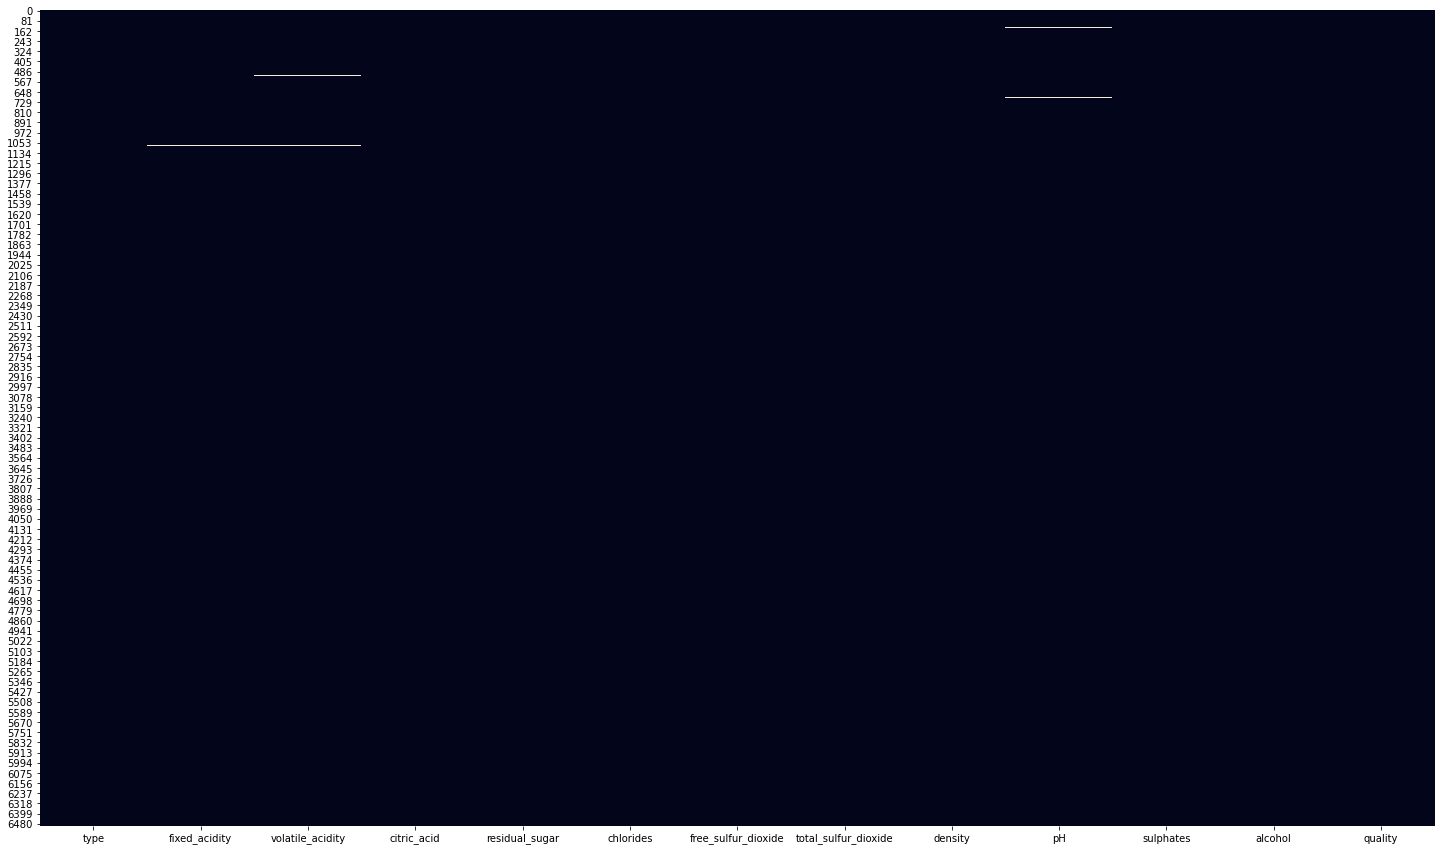

In [24]:
# set the figure size
plt.figure(figsize=(25,15))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(df_wine.isnull(), cbar=False)

# display the plot
plt.show()

We have **7 columns with a few missing values** present in the dataset

**Missing Values Replacement**

In [25]:
df=df_wine[['fixed_acidity','pH','volatile_acidity','sulphates','citric_acid','chlorides','residual_sugar']]

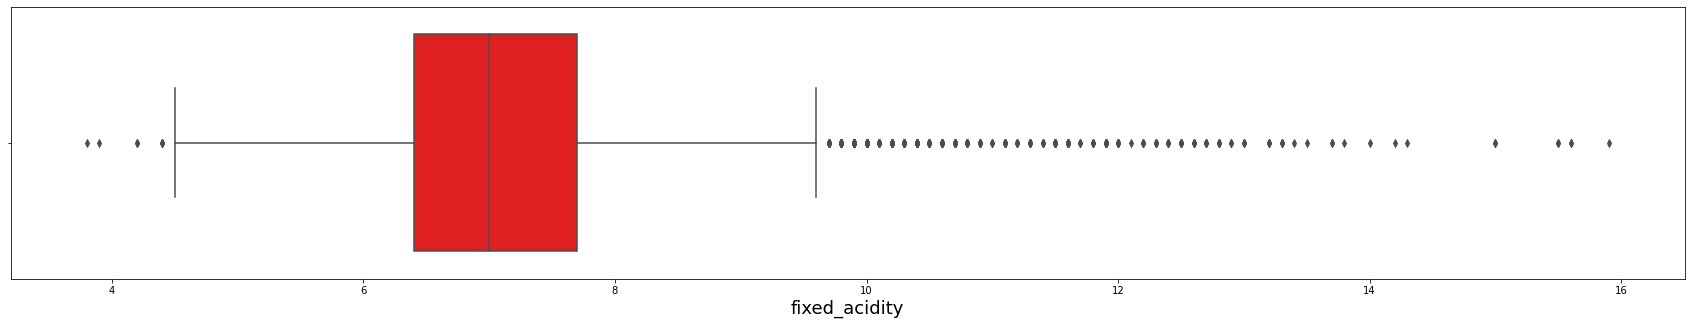

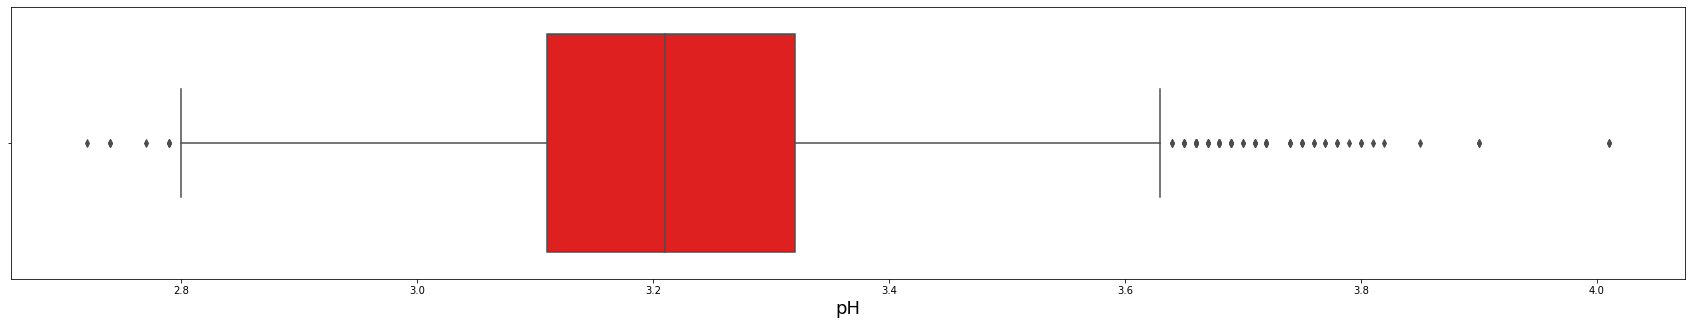

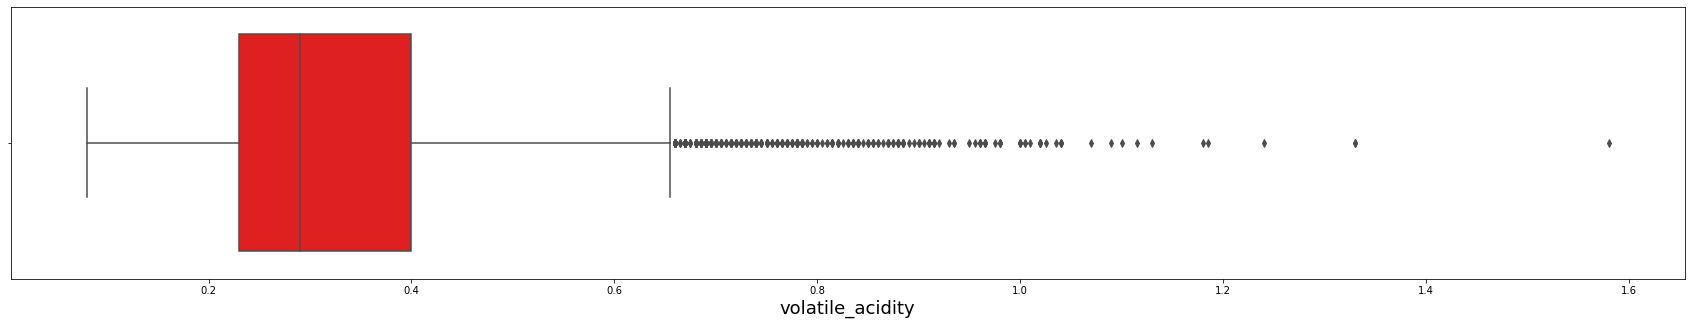

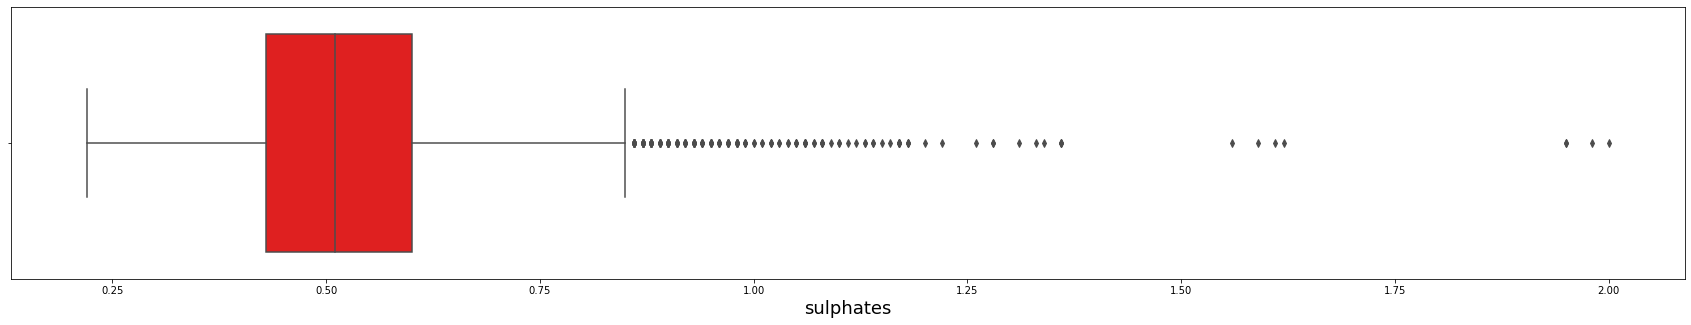

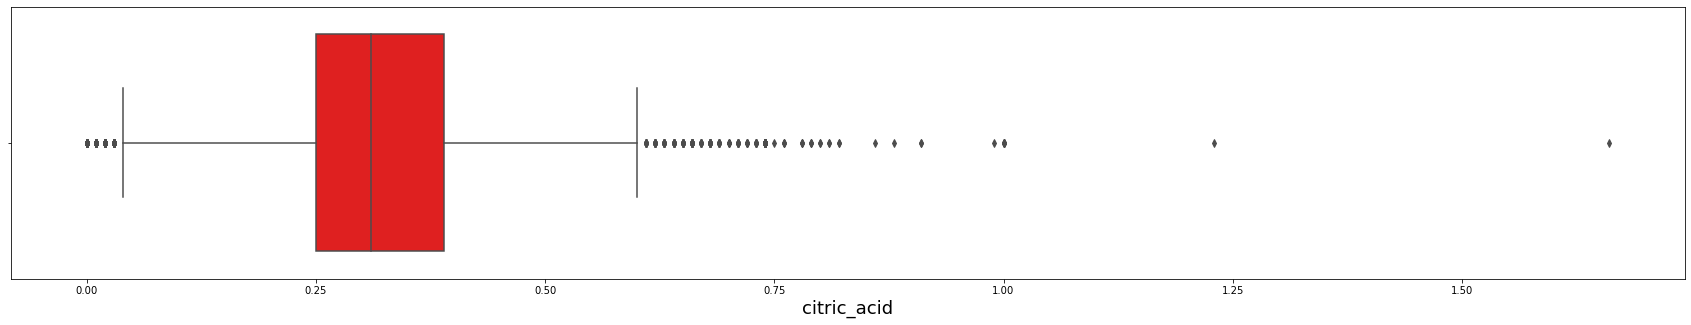

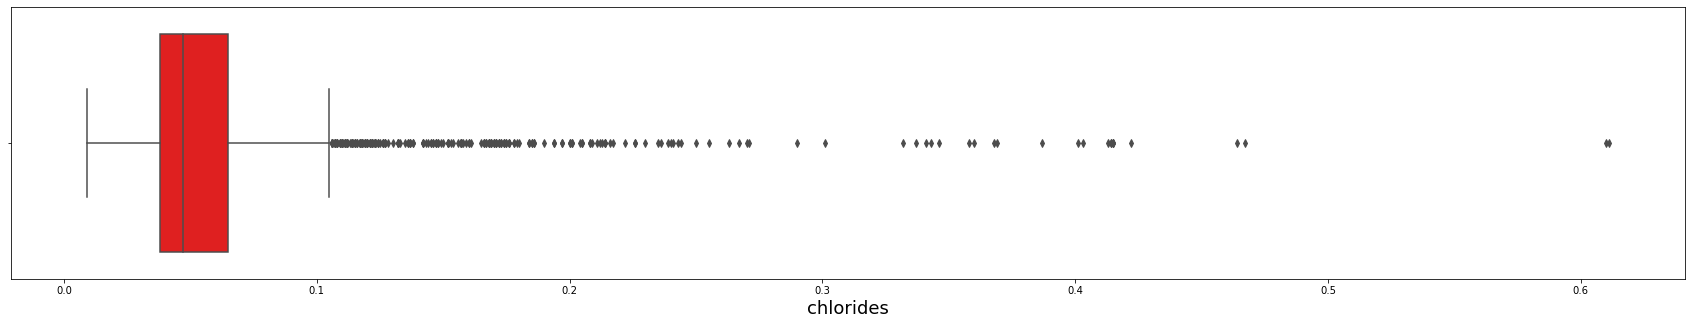

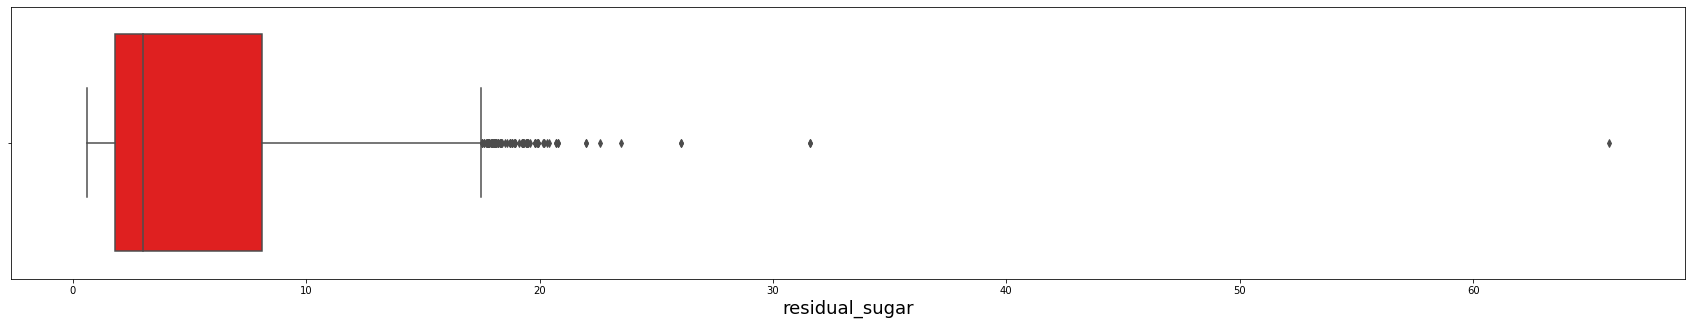

In [26]:
for column in enumerate(df):
    plt.figure(figsize=(30,5))
    #sns.set_theme(style="darkgrid",palette='deep')
    sns.boxplot(x=column[1], data=  df,color='red')
    plt.xlabel(column[1],fontsize=18)
    plt.show()

Since,there are many outliers present in the data for each column with missing values, we are replacing the null values using median.

In [27]:
for column in df.columns:
    df_wine[column]= df_wine[column].fillna(df_wine[column].median())

In [28]:
df_wine.isna().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**Visualising missing values using Heatmap**

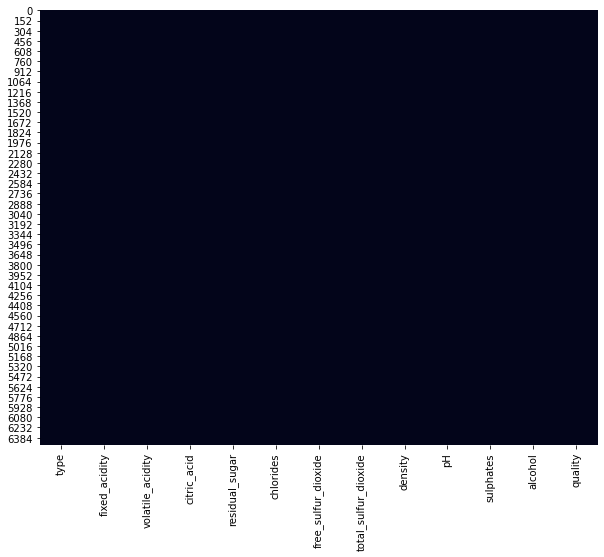

In [29]:
# set the figure size
plt.figure(figsize=(10,8))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(df_wine.isnull(), cbar=False)

# display the plot
plt.show()

Now, There are **No missing values** present in the dataset

### 4.1.4 Duplicate Data <a id='duplicate'></a>

In [1]:
duplicate = df_wine.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

NameError: name 'df_wine' is not defined

**Getting rid of duplicate data**

In [31]:
df_wine.drop_duplicates(inplace=True)

**Checking for duplicate data after removal of duplicates**

In [32]:
duplicate = df_wine.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 0 duplicated rows in the data


### 4.1.5 Indexing <a id='indexing'></a>

In [33]:
df_wine.shape

(5329, 13)

There are **5329 records** after dropping duplicates

In [34]:
df_wine.tail(5).style.set_properties(**{'background-color':'black','color':'white','border-color':'red'})

**The last 5 index values range from 6491-6496 but we have only 5329 records thus the indexes need to be reset**

In [35]:
df_wine.reset_index(inplace=True,drop=True)

In [36]:
df_wine.tail().style.set_properties(**{'background-color':'black','color':'white','border-color':'red'})

### 4.1.6 Final Dataset <a id='final_dataset'></a>

In [37]:
df_wine.shape

(5329, 13)

In [38]:
df_wine.head().style.set_properties(**{'background-color':'black','color':'white','border-color':'red'})

The final dataset has **5329 records and 13 features with no missing and duplicate values**

## 4.2 Understanding the Dataset <a id='Data_Understanding'></a>

### 4.2.1 Summary Statistics <a id='Summary_Statistics'></a>

**Numeric Variables**

In [39]:
df_wine.describe(include=np.number).style.set_properties(**{'background-color':'black','color':'white','border-color':'red'})

From the above table , we can infer:

    1. The minimum pH value is 2.7 and maximum pH value found is 4.01 thus all wine are acidic in nature
    
    2. The alocohl content in wine range from 8 to 15 with an average of 10.5
    
    3. The free_sulfur_dioxide in wine is less than 41 for 75% which is still 4 times less than that of total sulfur dioxide
    
    4. The maximum amount of fixed_acidity is 15.9 while 75% of it is less than 7.7 which implies possible outliers

**Categorical Variables**

In [40]:
df_wine.describe(include = object).style.set_properties(**{'background-color':'black','color':'white','border-color':'red'})

From the above table, we can infer:

    1. There are two types of wine with white frequenting more
    
    2. There are seven unqiue records for the quality of wine with 6 being chosen the most

### 4.2.2 Correlation <a id='correlation'></a>

In [41]:
corr_matrix=df_wine.corr()
corr_matrix.style.set_properties(**{'background-color':'black','color':'white','border-color':'red'})

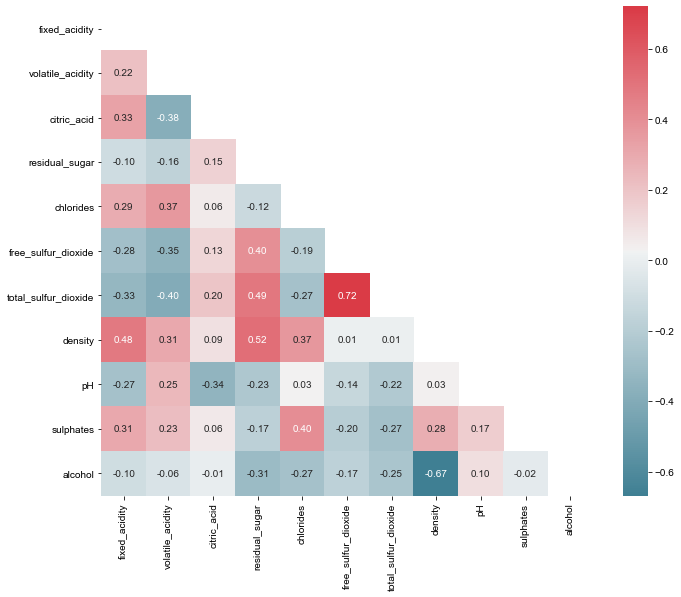

In [42]:
plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.5)

**Inferences:**
1. free_sufur_dioxide is highly positively correlated with total_sulfur_dioxide
    
2. density is moderatly positively correlated with fixed_acidity and residual_sugar whilst moderately negatively        correlated with alcohol
    
3. Relation degrees are very low with each other, such as citric_acid, free_sulfur_dioxide, sulpahtes and pH

### 4.2.3 Analyse Categorical Variables <a id='analyze_cat_var'></a>

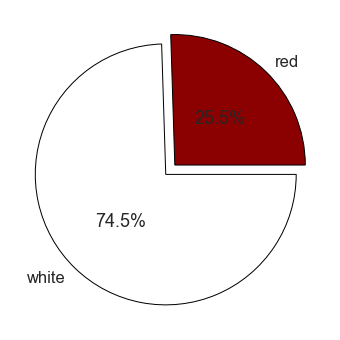

In [43]:
data = df_wine.groupby('type')['quality'].count()
fig, ax = plt.subplots(figsize=[10,6])
labels = ['red','white']
ax = plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*2, labels=labels, colors=['darkred','white'],
             wedgeprops={"edgecolor":"black"},pctdistance=0.5)
plt.show()

From the above pie chart, we can infer:

    1. About 75% of the data is pertaining to white wine while the remaining is of red wine

### 4.2.4 Analyse Target Variable <a id='analyze_tar_var'></a>

In [44]:
quaity_mapping = { 3 : "Low",4 : "Low",5: "Low",6 : "High",7: "High",8 : "High",9 : "High"}
df_wine["quality"] =  df_wine["quality"].map(quaity_mapping)

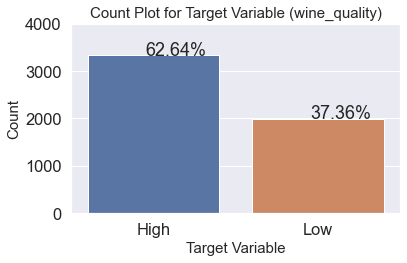

In [45]:
df_target = df_wine['quality'].copy()

df_target.value_counts()
sns.countplot(x = df_target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -0.05, y = df_target.value_counts()[0]+1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1]+1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.yticks([0,1000,2000,3000,4000])
plt.title('Count Plot for Target Variable (wine_quality)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.tight_layout()
# to show the plot
plt.show()

From the above graph, we can infer:
     Majority of the wine is high quality and the target column is balanced.

### 4.2.5 Analyse Relationship between Target and Independent Variables <a id='analyze_tar_ind_var'></a>

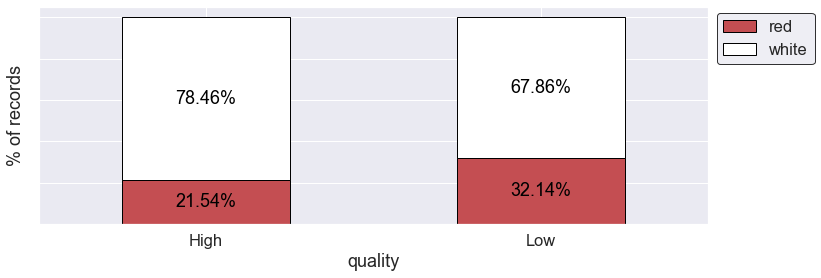

In [46]:
fig, ax = plt.subplots(figsize=(12,4))
pd.options.display.float_format = '{:,.2f}'.format

bar_chart = df_wine.groupby(['type','quality'])['quality'].count().unstack('type')
bar_chart= (bar_chart.T/bar_chart.T.sum()).T
ax = bar_chart.plot(kind='bar', stacked=True, color=['r','w'], edgecolor='black', ax=ax)

labels = []
for j in bar_chart.columns:
    for i in bar_chart.index:
          label = str('{0:.2%}'.format(bar_chart.loc[i][j]))
          labels.append(label)

patches = ax.patches

for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center', color='black')

ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(labels='')
ax.set_ylabel('% of records')
plt.legend(bbox_to_anchor = (1, 1.01), edgecolor='black')
plt.show()

From the above graph:
    We can infer that majority is white wine compared to red wine in both high and low quality.

[Text(0.5, 1.0, 'Quality v/s Alcohol')]

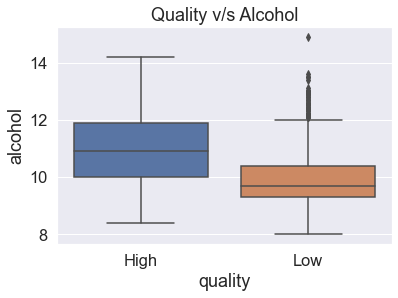

In [47]:
sns.boxplot(data=df_wine, x="quality", y ="alcohol").set(title='Quality v/s Alcohol')

From the above boxplot, we can infer:
     Wine with high alcohol content have gotten higher ratings than that of wine with low alcohol content.

In [48]:
def KdeAndBox(at1,at2):
    plt.figure(figsize=(14,9))
    plt.subplot(2,2,1)
    sns.kdeplot(df_wine.loc[df_wine["quality"]=="Low"][at1],shade=True)
    sns.kdeplot(df_wine.loc[df_wine["quality"]=="High"][at1],shade=True)

    plt.legend(["Low","High"])
    plt.title(at1.upper(),fontsize=15)
    plt.subplot(2,2,2)
    sns.kdeplot(df_wine.loc[df_wine["quality"]=="Low"][at2],shade=True)
    sns.kdeplot(df_wine.loc[df_wine["quality"]=="High"][at2],shade=True)
    plt.legend(["Low","High"])
    plt.title(at2.upper(),fontsize=15)
    plt.subplot(2,2,3)
    sns.violinplot(data=df_wine,y=at1,x="quality")
    plt.subplot(2,2,4)
    sns.violinplot(data=df_wine,y=at2,x="quality")
    plt.show()

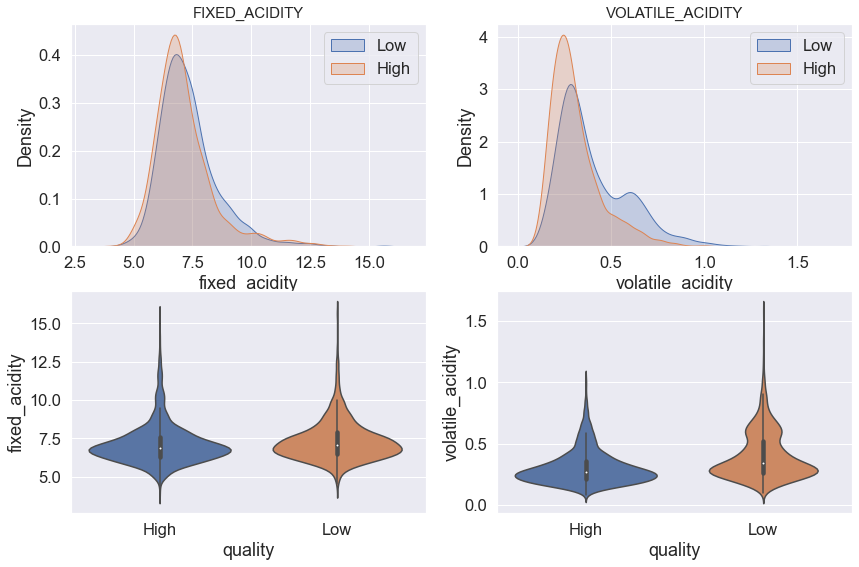

In [49]:
KdeAndBox("fixed_acidity","volatile_acidity")

From the above KDE plot, we can infer:
    1. The distribution for both, volatile_acidity and fixed_acidity for Low and High wine quality seem to be highly        positively skewed.
    2. For fixed_acidity, values between 6-7.5 depict highest probability density irrespective of quality and there is not   much difference between the probability density for Low and High.
    3. For volatile_acidity, values between 0-0.5 depict highest probabilty density irrespective of quality but the         probabiltity density for High quality wine is greater than that of Low quality.

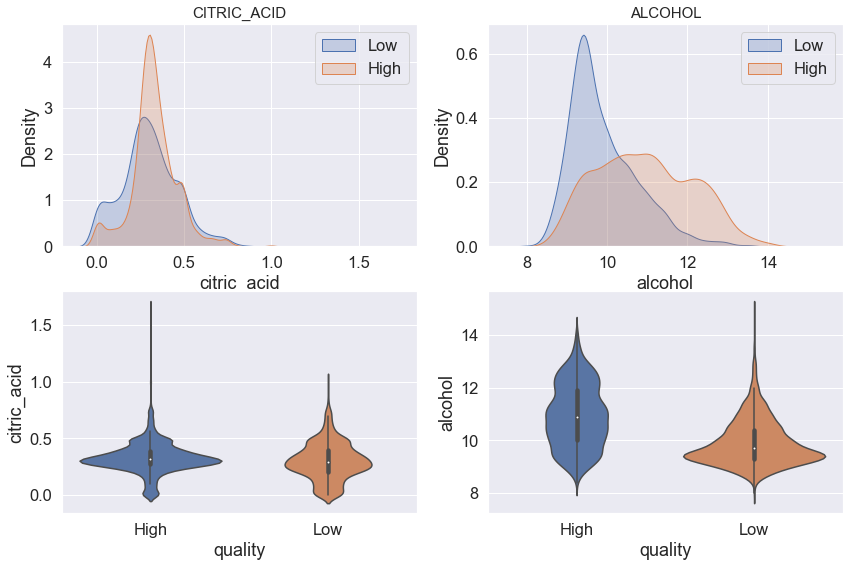

In [50]:
KdeAndBox("citric_acid","alcohol")

From the above KDE plot, we can infer:
    1. The distribution for citric_acid when the quality is Low seems to be close to normally distributed whilst when        quality is High it seems to be moderatley positively skewed
    2. The distribution for alcohol when the quality is Low seems to be highly positively skewed whilst when the quality is High the distribution seems very close to being normally distributed
    3. For citric_acid, values between 0-0.5 depict highest probability density irrespective of quality and there is a lot  of difference between the probability density for Low and High.
    4. For alcohol, values between 8-10 depict highest probabilty density for Low quality wine while high quality wine seems to be normally distributed with the highest point between 10-12

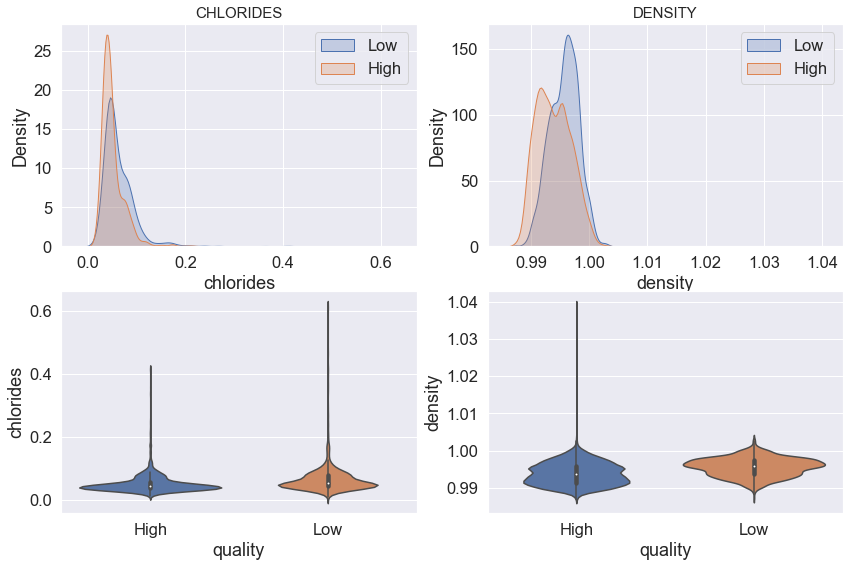

In [51]:
KdeAndBox("chlorides","density")

From the above KDE plot, we can infer:
    1. The distribution for chlorides seems to be extremely highly positive skewed irrespective of the quality
    2. The distribution for density when the quality is Low seems to be negatively skewed whilst when the quality is High   the distribution seems to be positively skewed
    3. For chlorides, values between 0-0.1 depict highest probability density irrespective of quality and there is a lot  of difference between the probability density for Low and High.
    4. For density, values between 0.99-1 depict highest probabilty density irrespective of the quality

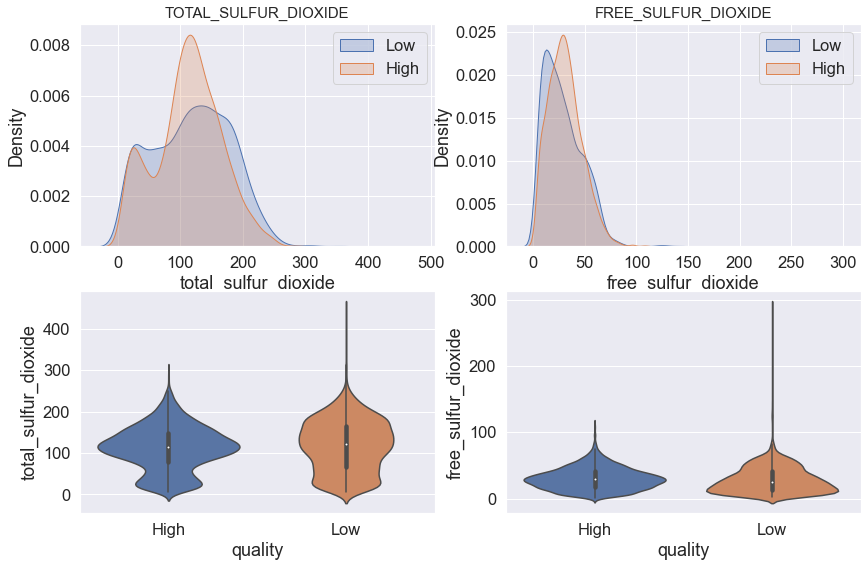

In [52]:
KdeAndBox("total_sulfur_dioxide","free_sulfur_dioxide")

From the above KDE plot, we can infer:
    1. The distribution for total_sulfur_dioxide seems to be normally distributed for both quality types
    2. The distribution for free_sulfur_dioxide seems to be highly positively skewed for both quality types
    3. For total_sulfur_dioxide, values between 50-150 depict highest probability density when quality of wine is High       whilst the probably density function seems to be evenly spread across 50-200
    4. For free_sulfur_dioxide, values between 0-50 depict highest probabilty density irrespective of the quality

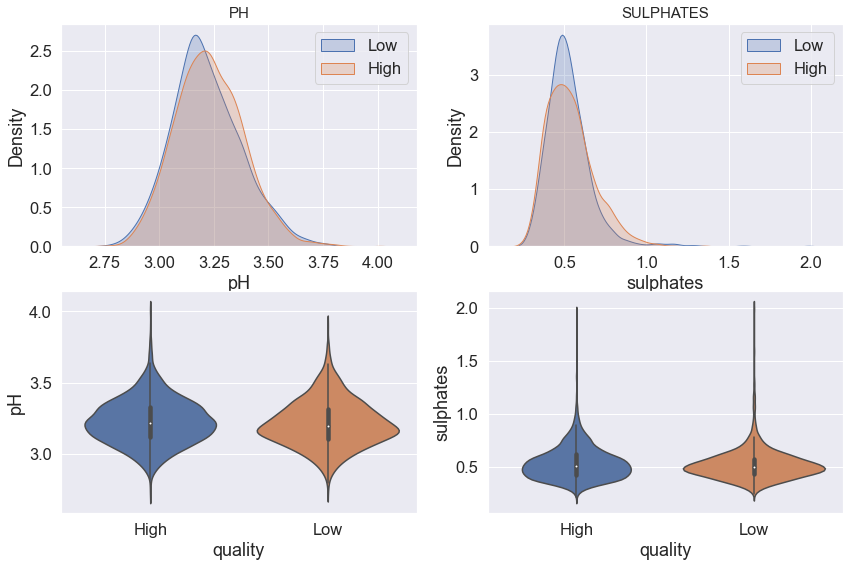

In [53]:
KdeAndBox("pH","sulphates")

From the above KDE plot, we can infer:
    1. The distribution for pH seems to be normally distributed for both quality types
    2. The distribution for sulphates seems to be highly positively skewed for both quality types
    3. For pH, values between 3-3.5 depict highest probability density for both quality types
    4. For sulphates, values around 0.5 depict highest probabilty density irrespective of the quality

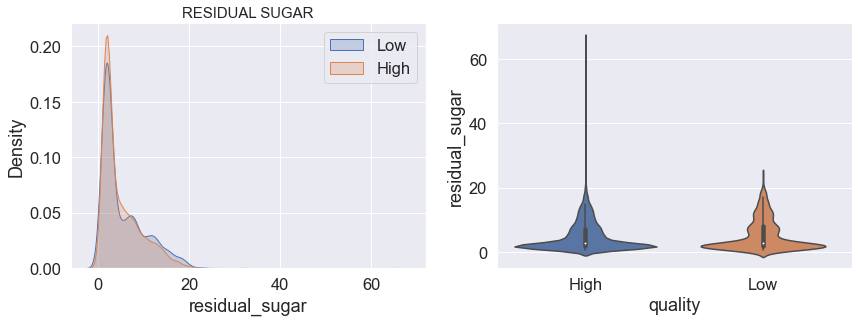

In [54]:
plt.figure(figsize=(14,4.5))
plt.subplot(1,2,1)
sns.kdeplot(df_wine.loc[df_wine["quality"]=="Low"]["residual_sugar"],shade=True)
sns.kdeplot(df_wine.loc[df_wine["quality"]=="High"]["residual_sugar"],shade=True)

plt.legend(["Low","High"])
plt.title("residual sugar".upper(),fontsize=15)
plt.subplot(1,2,2)
sns.violinplot(data=df_wine,y="residual_sugar",x="quality")
plt.show()


From the above KDE plot, we can infer:
    1. The distribution for residual_sugar seems to be highly positively skewed for both quality types
    3. For residual_sugar, values between 0-5 depict highest probability density for both quality types

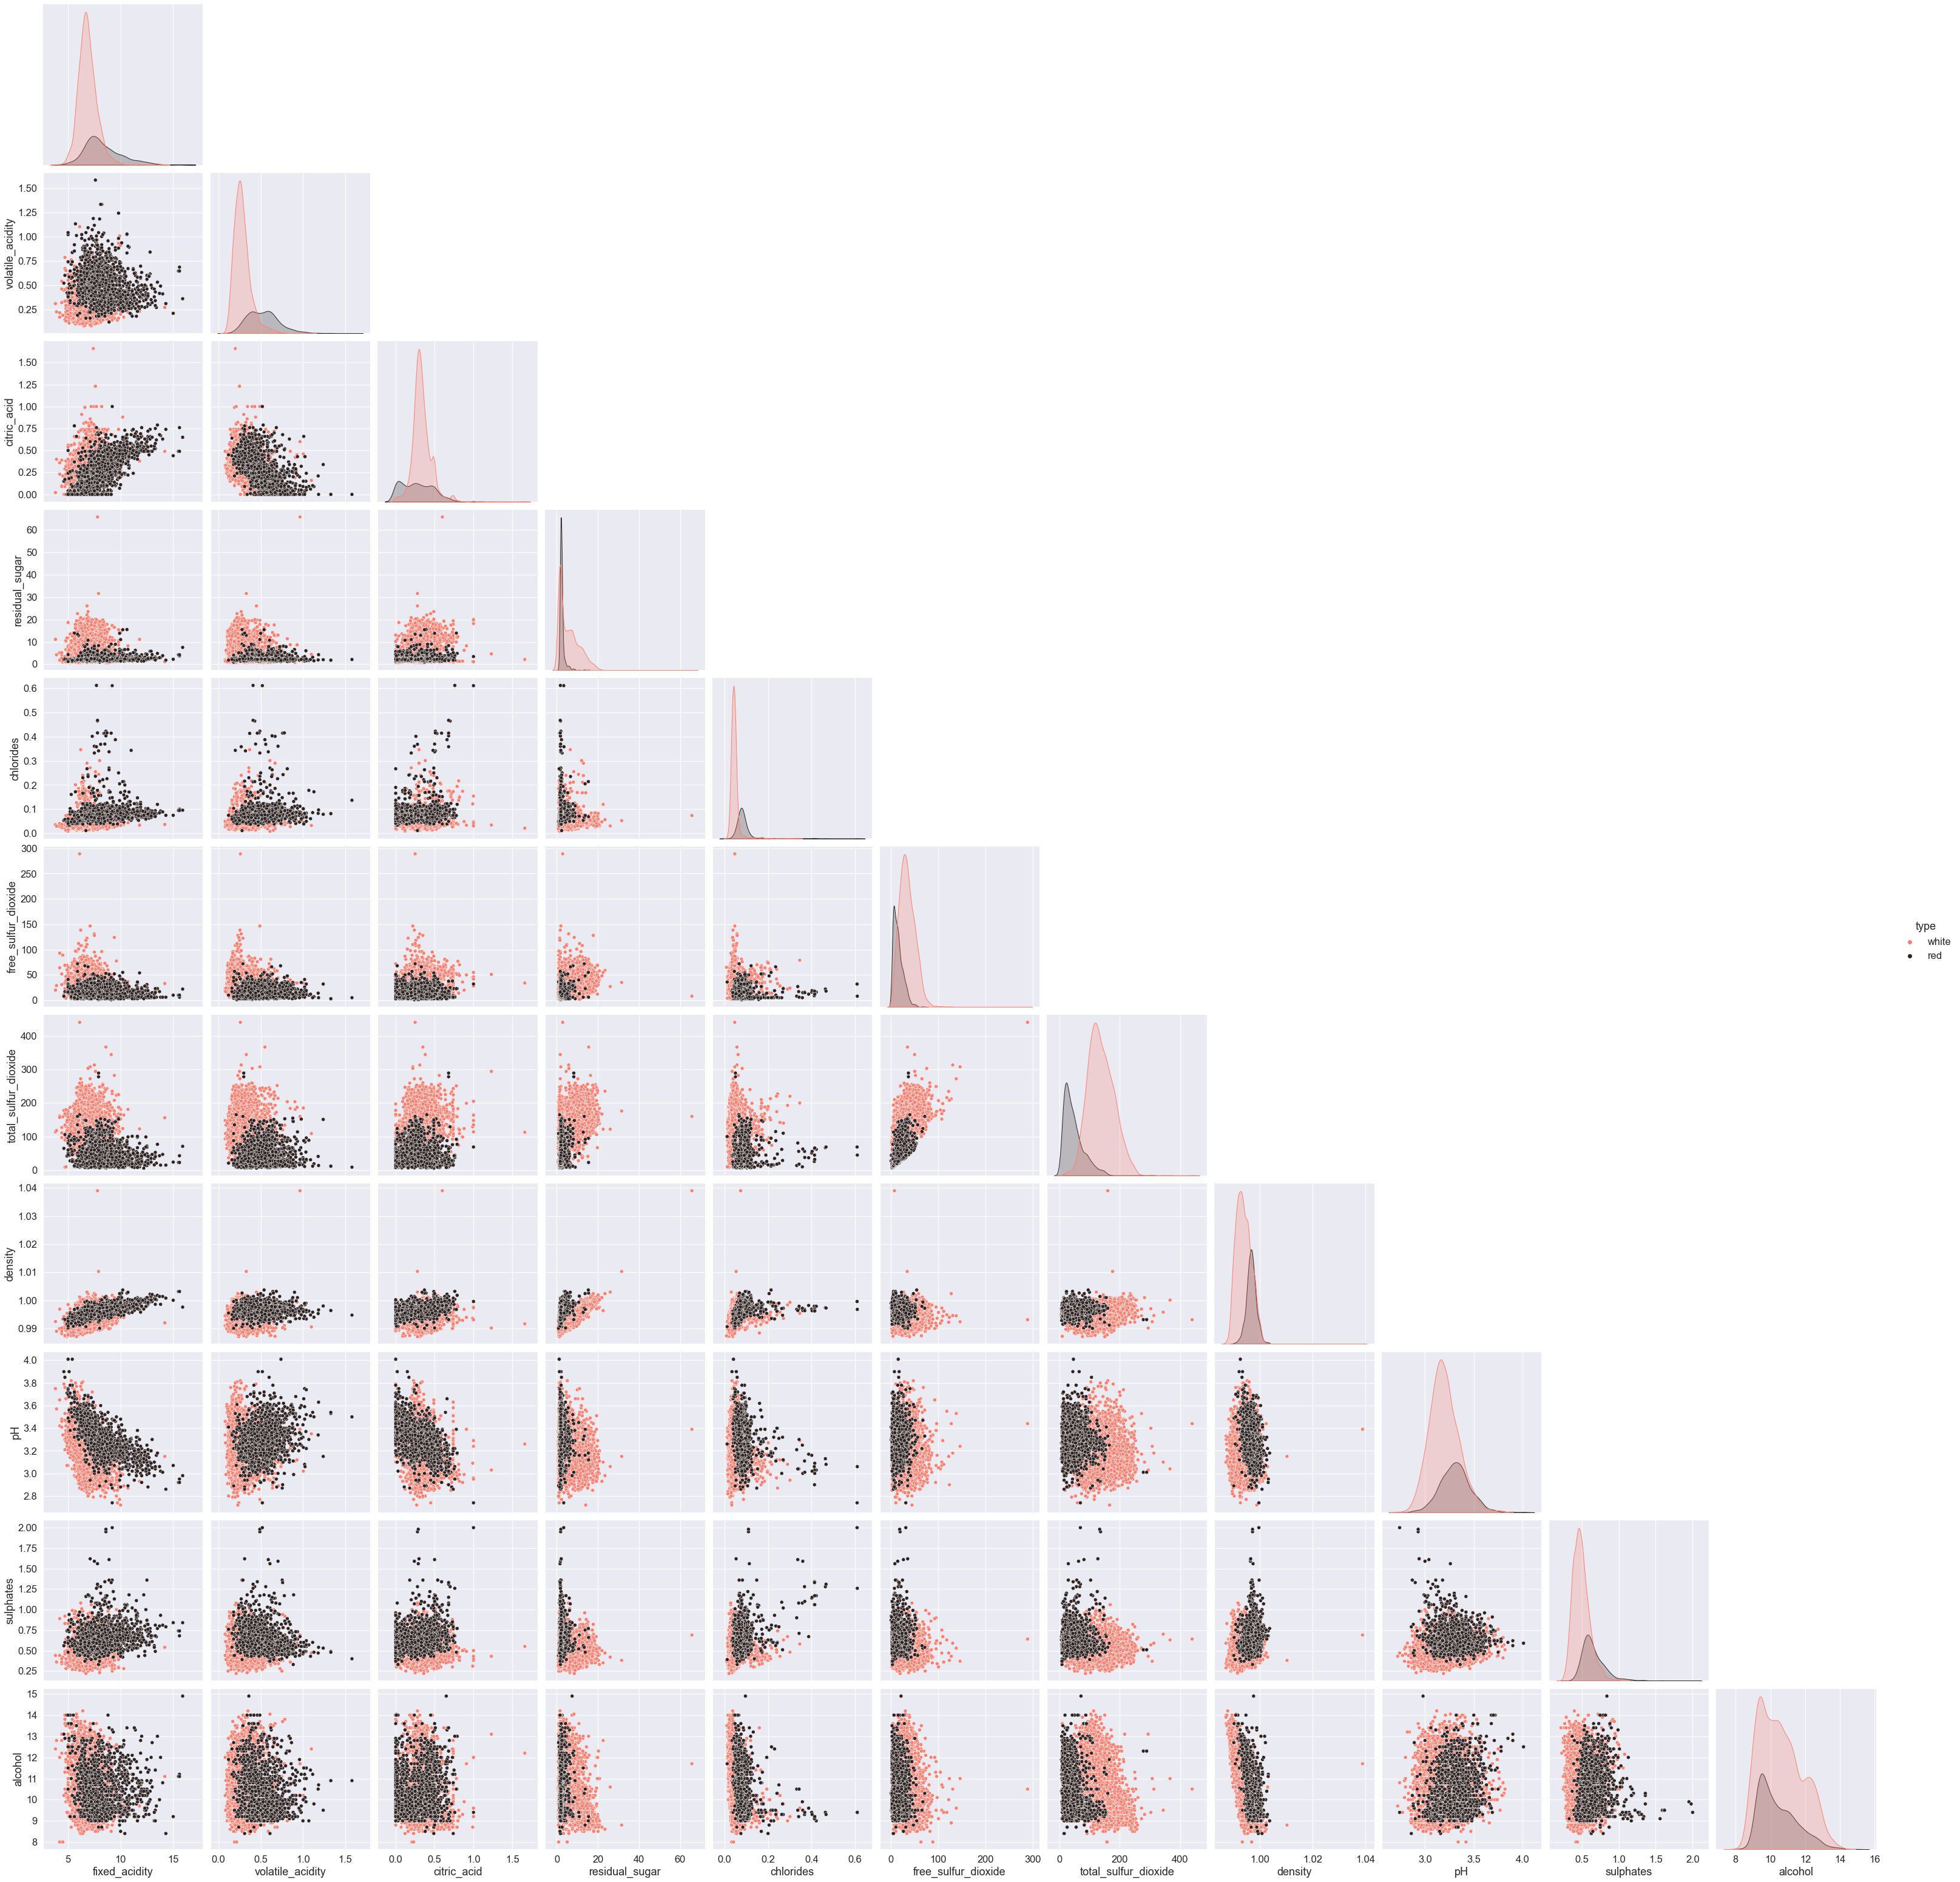

In [55]:
# Seaborn pairplot
sns_plot = sns.pairplot(df_wine,corner=True,hue='type',palette='dark:salmon_r',height=4.0)
plt.show()

### 4.2.6 Feature Engineering <a id='feature_eng'></a>

**Sulfur dioxide ratio**

Since free sulfur dioxide is the unbound part of total sulfur dioxide, we will caculate the ratio of this two features. This feature has higher correlation to quality than each of the individuals

In [56]:
df_wine['sulfur_dioxide_ratio'] = df_wine['free_sulfur_dioxide']/df_wine['total_sulfur_dioxide']

In [57]:
df_wine.drop(['free_sulfur_dioxide'],axis=1,inplace=True)

In [58]:
df_wine.head().style.set_properties(**{'background-color':'black','color':'white','border-color':'red'})

# 5. Data Preprocessing <a id='data_pre'></a>

## 5.1 Outliers <a id='out'></a>

### 5.1.1 Discovery of Outliers<a id='dis_out'></a>

In [3]:
df_num_features=df_wine.select_dtypes(include=np.number)

NameError: name 'df_wine' is not defined

**Identifying outliers using IQR**

In [60]:
Q1 = df_num_features.quantile(0.25)
Q3 = df_num_features.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed_acidity           1.30
volatile_acidity        0.18
citric_acid             0.16
residual_sugar          5.70
chlorides               0.03
total_sulfur_dioxide   79.00
density                 0.00
pH                      0.22
sulphates               0.17
alcohol                 1.90
sulfur_dioxide_ratio    0.15
dtype: float64


In [61]:
outlier = pd.DataFrame((df_num_features < (Q1 - 1.5 * IQR)) | (df_num_features > (Q3 + 1.5 * IQR)))

In [62]:
for i in outlier.columns:
    print('Total number of Outliers in column {} are {}'.format(i, (len(outlier[outlier[i] == True][i]))))

Total number of Outliers in column fixed_acidity are 304
Total number of Outliers in column volatile_acidity are 279
Total number of Outliers in column citric_acid are 143
Total number of Outliers in column residual_sugar are 142
Total number of Outliers in column chlorides are 237
Total number of Outliers in column total_sulfur_dioxide are 10
Total number of Outliers in column density are 3
Total number of Outliers in column pH are 49
Total number of Outliers in column sulphates are 163
Total number of Outliers in column alcohol are 1
Total number of Outliers in column sulfur_dioxide_ratio are 175


**Visualizing outliers using Boxplots**

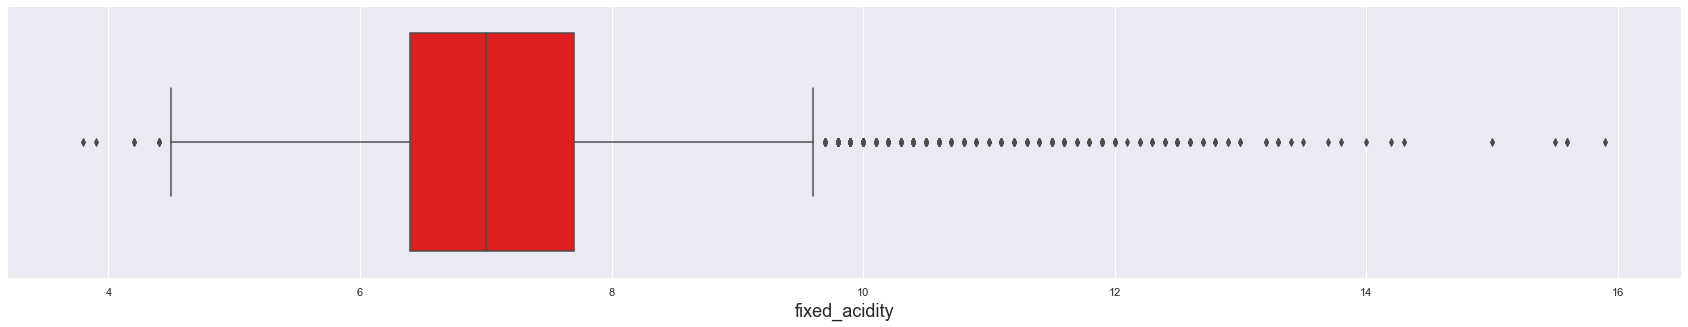

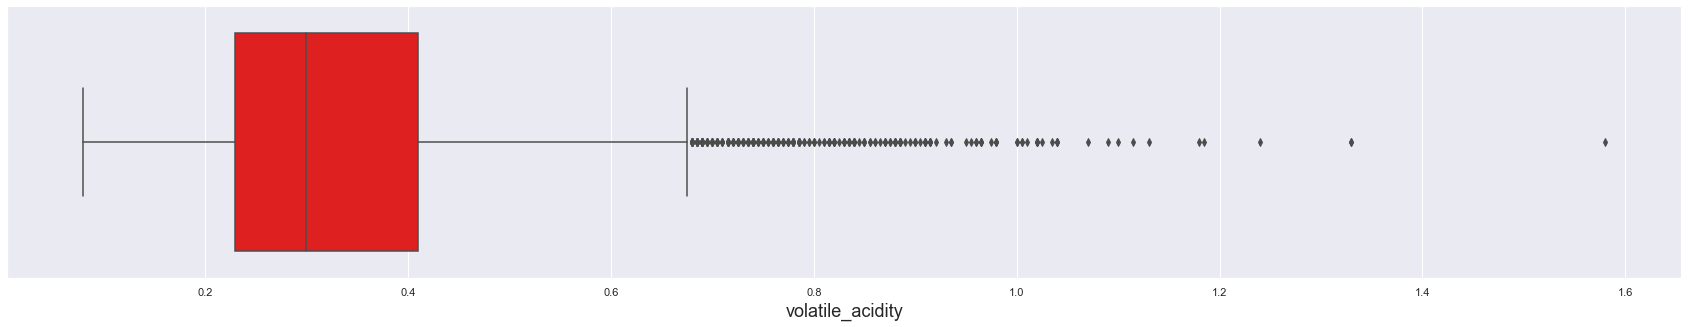

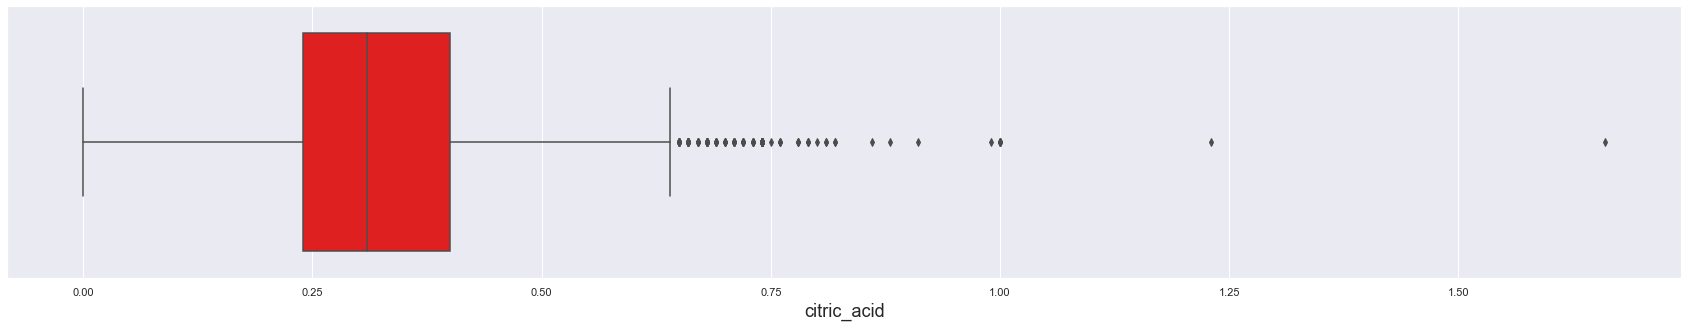

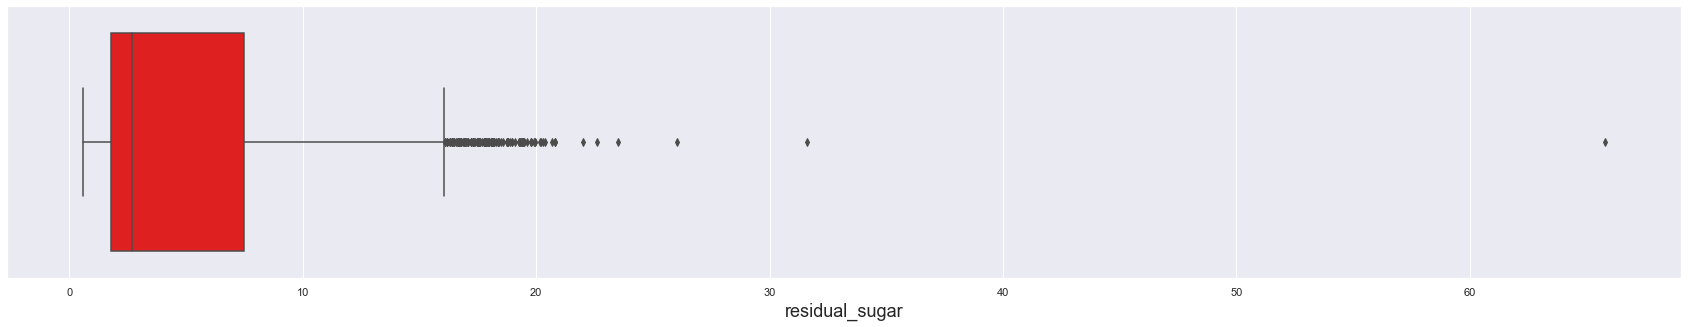

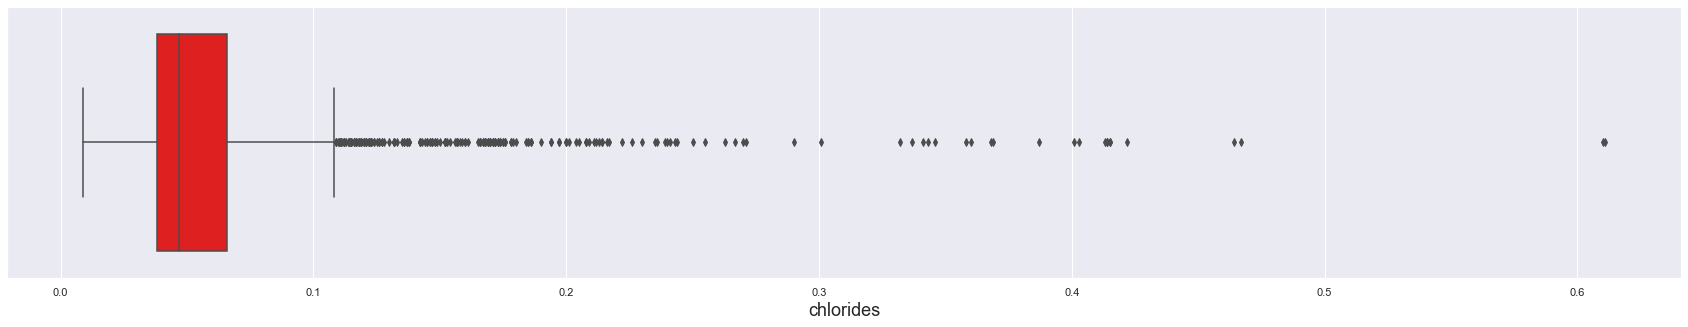

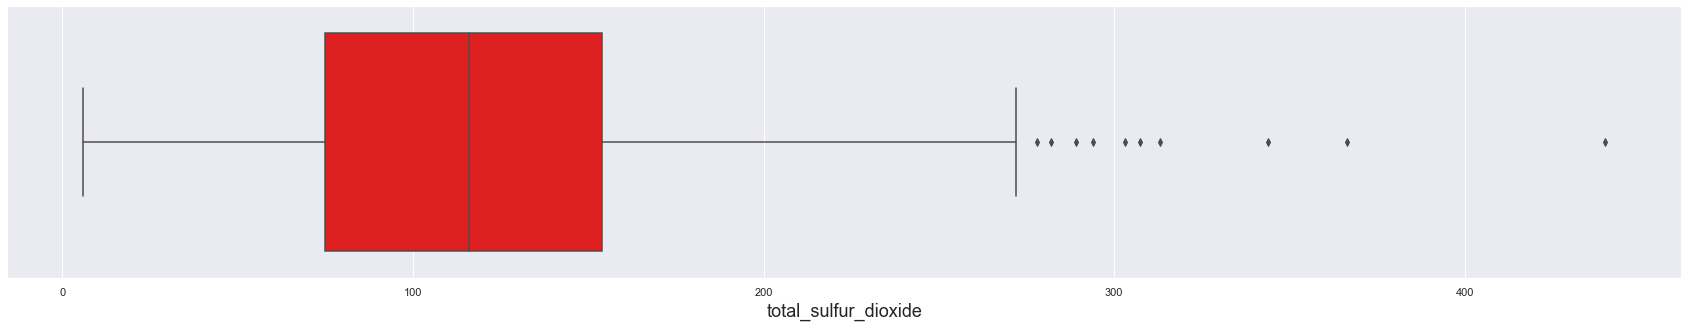

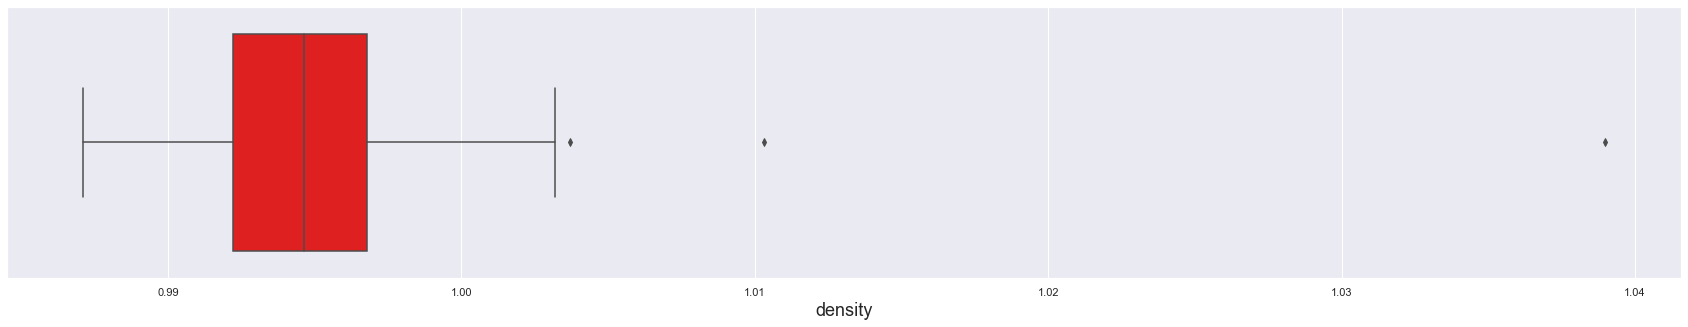

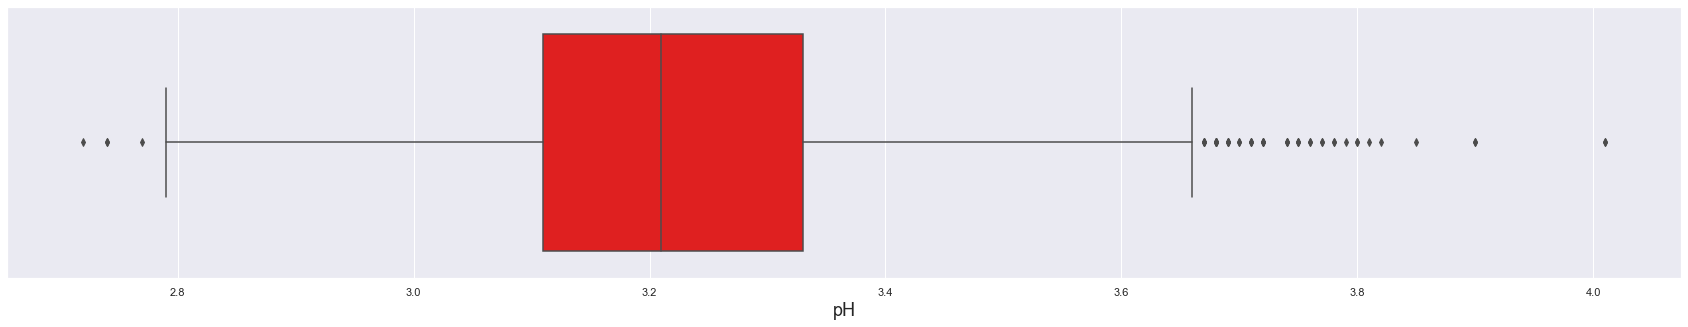

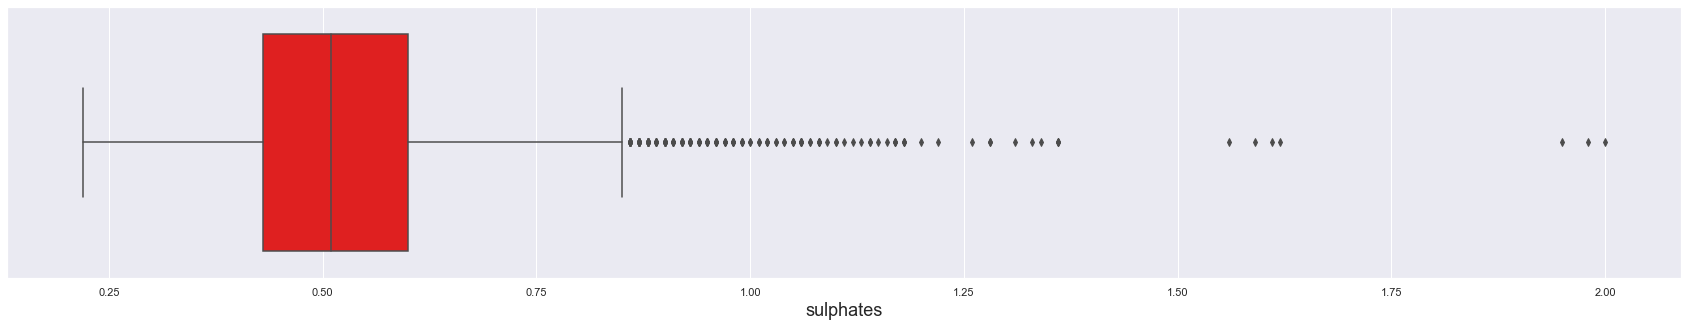

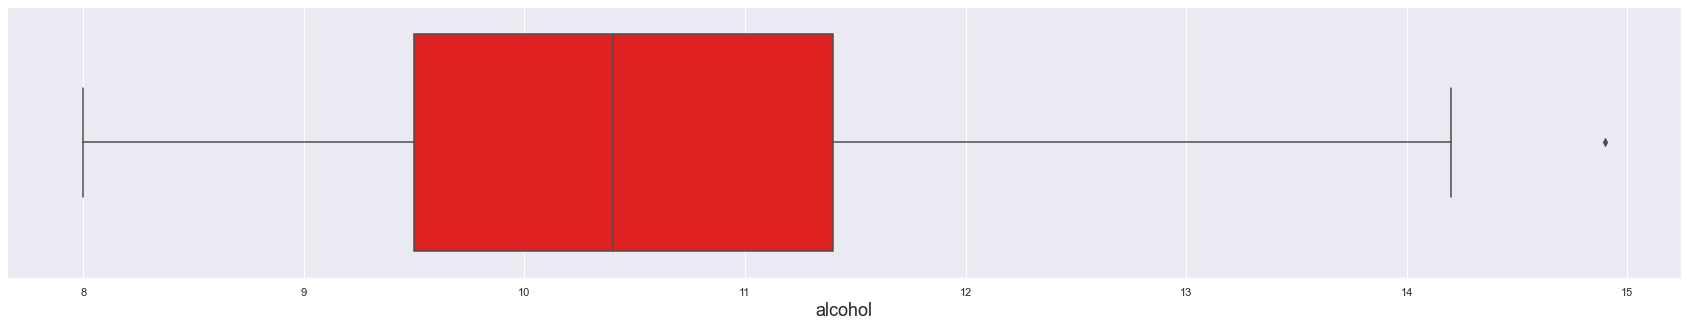

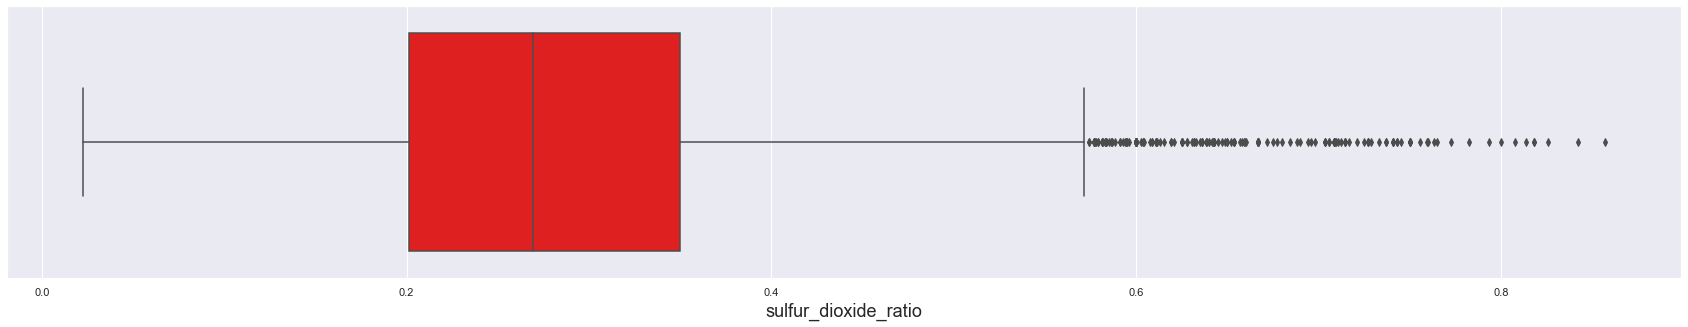

In [63]:
for column in enumerate(df_num_features):
    plt.figure(figsize=(30,5))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  df_num_features,color='red')
    plt.xlabel(column[1],fontsize=18)
    plt.show()

### 5.1.2 Removal of Outliers<a id='rem_out'></a>

**Checking the normality of numeric features**

In [64]:
import scipy
from scipy.stats import shapiro
stat, p_value = shapiro(df_num_features)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.38135790824890137
P-Value: 0.0


Since the numeric features are not normal we are removing the outliers using IQR method

In [65]:
df_wine = df_wine[~((df_wine < (Q1 - 1.5 * IQR)) |(df_wine > (Q3 + 1.5 * IQR))).any(axis=1)]
df_wine.shape

(4161, 13)

In [66]:
df_wine.reset_index(inplace=True,drop=True)

In [67]:
df_wine.tail().style.set_properties(**{'background-color':'black','color':'white','border-color':'red'})

### 5.1.3 Re-checking Correlation<a id='rec_cor'></a>

In [68]:
data_num_features = df_wine.select_dtypes(include=np.number)
# print the names of the numeric variables 
print('The numerical columns in the dataset are: ',data_num_features.columns)

The numerical columns in the dataset are:  Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates',
       'alcohol', 'sulfur_dioxide_ratio'],
      dtype='object')


In [69]:
corr =  data_num_features.corr()

# print the correlation matrix
corr.style.set_properties(**{'background-color':'black','color':'white','border-color':'red'})

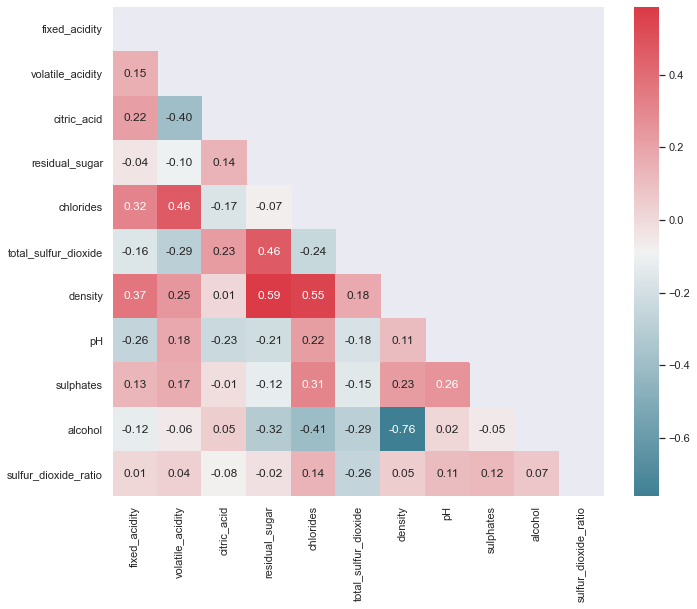

In [70]:
plt.figure(figsize=(11,9))
dropSelf = np.zeros_like(corr_matrix)
dropSelf[np.triu_indices_from(dropSelf)] = True

sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)

sns.set(font_scale=1.5)

Recheck of correlation after treating outliers. There has been a slight change with respect to the correlation between numeric values

## 5.2 Categorical Encoding<a id='cat_enc'></a>

In [71]:
df_wine['type']=pd.get_dummies(df_wine['type'])
quaity_mapping = {"Low":0, "High":1}
df_wine["quality"] =  df_wine["quality"].map(quaity_mapping)
df_wine.head().style.set_properties(**{'background-color':'black','color':'white','border-color':'red'})

In [72]:
df_wine.dtypes

type                      uint8
fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
sulfur_dioxide_ratio    float64
dtype: object

## 5.3 Feature Scaling<a id='fea_sca'></a>

In [73]:
df_num_features=df_wine.drop(['type','quality'],axis=1)

**Checking normality for numerical columns**

In [74]:
for col in df_num_features.columns:
    print("Column ", col, " :", shapiro(df_num_features[col]))

Column  fixed_acidity  : ShapiroResult(statistic=0.9829780459403992, pvalue=5.529318188101711e-22)
Column  volatile_acidity  : ShapiroResult(statistic=0.9187334179878235, pvalue=1.0888089067803829e-42)
Column  citric_acid  : ShapiroResult(statistic=0.9792265892028809, pvalue=3.1834134731395634e-24)
Column  residual_sugar  : ShapiroResult(statistic=0.8547176122665405, pvalue=0.0)
Column  chlorides  : ShapiroResult(statistic=0.9178357124328613, pvalue=7.342803953062041e-43)
Column  total_sulfur_dioxide  : ShapiroResult(statistic=0.9930048584938049, pvalue=2.136146890884677e-13)
Column  density  : ShapiroResult(statistic=0.9829161763191223, pvalue=5.045248397980111e-22)
Column  pH  : ShapiroResult(statistic=0.9968975186347961, pvalue=1.4817851479165256e-07)
Column  sulphates  : ShapiroResult(statistic=0.9782758951187134, pvalue=9.63103220067258e-25)
Column  alcohol  : ShapiroResult(statistic=0.9614955186843872, pvalue=6.689057151553337e-32)
Column  sulfur_dioxide_ratio  : ShapiroResult(st

Since none of the numerical features are normally distributed (p-value<0.05) , we will perform Min-Max normalisation to scale the data

In [75]:
mms = MinMaxScaler()
mmsfit = mms.fit(df_num_features)
dfxz = pd.DataFrame(mms.fit_transform(df_num_features), columns = df_num_features.columns)

In [76]:
dfxz.head().style.set_properties(**{'background-color':'black','color':'white','border-color':'red'})

In [77]:
df_cat=df_wine[['type','quality']]

In [78]:
dfxz = pd.concat([dfxz, df_cat], axis = 1)
dfxz.head().style.set_properties(**{'background-color':'black','color':'white','border-color':'red'})

In [79]:
dfxz.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
sulfur_dioxide_ratio    0
type                    0
quality                 0
dtype: int64

## 5.4 Train-Test Split<a id="split"></a>

Before applying various classification techniques to predict the quality of the wine, let us split the dataset in train and test set.

In [80]:
X=dfxz.drop('quality',axis=1)
y=dfxz['quality']

In [81]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (2912, 13)
y_train (2912,)
X_test (1249, 13)
y_test (1249,)


#### Creating a generalized function to create a dataframe containing the scores for the models.

In [82]:
# create an empty dataframe to store the scores for various algorithms
score_card1 = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card1(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = model.predict(X_test[features])

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card1

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card1 = score_card1.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

# 6. Logistic Regression<a id="log_reg"></a>

In [83]:
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.491074
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 2912
Model:                          Logit   Df Residuals:                     2899
Method:                           MLE   Df Model:                           12
Date:                Wed, 23 Jun 2021   Pseudo R-squ.:                  0.2312
Time:                        19:49:07   Log-Likelihood:                -1430.0
converged:                       True   LL-Null:                       -1859.9
Covariance Type:            nonrobust   LLR p-value:                2.396e-176
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.7526      0.528     -3.321      0.001      -2.787      -0.718

**Interpretation:** The `Pseudo R-squ.` obtained from the above model summary is **0.2312**  which is also the value of `McFadden's R-squared`. This value can be obtained from the formula:

<p style='text-indent:25em'> <strong> McFadden's R-squared = $ 1 - \frac{Log-Likelihood}{LL-Null} $</strong> </p>

Where,<br>
Log-Likelihood: It is the maximum value of the log-likelihood function<br>
LL-Null: It is the maximum value of the log-likelihood function for the model containing only the intercept 

The LLR p-value is less than 0.05, implies that the model is significant.

Even though the model is significant there are few features which are insignificant (P-value < 0.05)

**Backward Elimination Model**

To obtain the best significant features which are realated to target variable we perform backward elimination process below:

In [84]:
sfs_backward=sfs(estimator=LogisticRegression(),k_features='best',forward=False,verbose=0,scoring='accuracy')
sfs_model=sfs_backward.fit(X_train,y_train)
features=list(sfs_model.k_feature_names_)
print("The best features obtained from elimination process:",features)

The best features obtained from elimination process: ['const', 'fixed_acidity', 'volatile_acidity', 'residual_sugar', 'chlorides', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'sulfur_dioxide_ratio', 'type']


Now,building a Logistic regression model obtained from the above elimination process

In [85]:
logreg_backward = sm.Logit(y_train, X_train[features]).fit()

# print the summary of the model
print(logreg_backward.summary())

Optimization terminated successfully.
         Current function value: 0.491138
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                quality   No. Observations:                 2912
Model:                          Logit   Df Residuals:                     2900
Method:                           MLE   Df Model:                           11
Date:                Wed, 23 Jun 2021   Pseudo R-squ.:                  0.2310
Time:                        19:49:27   Log-Likelihood:                -1430.2
converged:                       True   LL-Null:                       -1859.9
Covariance Type:            nonrobust   LLR p-value:                3.184e-177
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.7896      0.524     -3.412      0.001      -2.817      -0.762

**Interpretation:** The `Pseudo R-squ.` obtained from the above model summary is **0.2310**  
The LLR p-value is less than 0.05, implies that the model is significant.

**Identifying the Best Cut-off Value**

Now, let us consider a list of values as cut-off to calculate the different performance measures.

In [86]:
# consider a list of values for cut-off
cutoff = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# use the for loop to compute performance measures for each value of the cut-off
# call the update_score_card() to update the score card for each cut-off
# pass the model and cut-off value to the function
for value in cutoff:
    update_score_card1(logreg_backward, value)

In [87]:
# print the score card 
print('Score Card for Logistic regression:')

# sort the dataframe based on the probability cut-off values ascending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card1 = score_card1.sort_values('Probability Cutoff').reset_index(drop = True)

# color the cell in the columns 'AUC Score', 'Accuracy Score', 'Kappa Score', 'f1-score' having maximum values
# 'style.highlight_max' assigns color to the maximum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card1.style.highlight_max(color = 'red', subset = ['Accuracy Score'])

Score Card for Logistic regression:


**Interpretation:** The above dataframe shows that,all the highest scores of different perfomance metrics.
The optimal probability cut-off score which is considered for futher analysis is taken by considering the **Accuracy Score**.

**Predictions on the train set.**

In [88]:
# let 'y_pred_prob1' be the predicted values of y
y_pred_prob1 = logreg_backward.predict(X_train[features])

# print the y_pred_prob1
y_pred_prob1.head()

3842   0.05
2767   0.85
1014   0.75
3313   0.70
2107   0.93
dtype: float64

We decided the cut-off to be 0.5. i.e. if 'y_pred_prob1' is less than 0.5, then consider it to be 0 else consider it to be 1.

In [89]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred1 = [ 0 if x < 0.5 else 1 for x in y_pred_prob1]
y_pred1[:10]

[0, 1, 1, 1, 1, 0, 1, 1, 0, 1]

**Predictions on the test set.**

In [90]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg_backward.predict(X_test[features])

# print the y_pred_prob
y_pred_prob.head()

2672   0.72
494    0.62
1064   0.95
1756   0.43
2501   0.84
dtype: float64

In [92]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]
y_pred[:10]

[1, 1, 1, 0, 1, 0, 1, 1, 1, 0]

**Confusion Matrix**

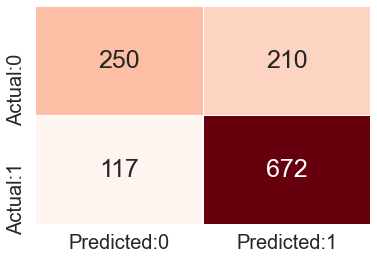

In [100]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot= True, fmt = 'd', cmap ='Reds', cbar = False, linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

**Train Report**

In [101]:
print(classification_report(y_train, y_pred1))

              precision    recall  f1-score   support

           0       0.67      0.55      0.60       980
           1       0.79      0.86      0.83      1932

    accuracy                           0.76      2912
   macro avg       0.73      0.71      0.71      2912
weighted avg       0.75      0.76      0.75      2912



**Interpretation:** From the above output, we can see that the training model has 76% accuracy.

**Test Report**

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.54      0.60       460
           1       0.76      0.85      0.80       789

    accuracy                           0.74      1249
   macro avg       0.72      0.70      0.70      1249
weighted avg       0.73      0.74      0.73      1249



**Interpretation:** From the above output, we can see that the model  is 74% accurate.

From the above classification reports,we can infer that there is a little difference when compared to test and train reports.
Hence we conclude that the model is bit overfitted.

**ROC Curve**

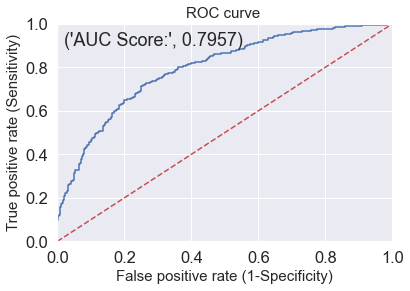

In [103]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve ', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_prob),4)))
                               
# plot the grid
plt.grid(True)

**Interpretation:** The red dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br>
From the above plot, we can see that our classifier (logistic regression with features obtained from Backward elimination method) is away from the dotted line; with the AUC score **0.7957**

**Score Card**

In [104]:
#defining a score card
score_card=pd.DataFrame(columns=['Model_Name','Accuracy(Train)','Accuracy(Test)','Diff_b/w_train&test(Acc)','AUC_Score','Avg(Acc)'])

In [105]:
# Predicting Cross Validation Score
cv_lr = cross_val_score(estimator = LogisticRegression() , X = X_train[features], y = y_train, cv = 10,scoring='accuracy')

In [106]:
score_card=score_card.append({'Model_Name': 'Logistic Regression',
                             'Accuracy(Train)': metrics.accuracy_score(y_train, y_pred1),
                             'Accuracy(Test)':metrics.accuracy_score(y_test, y_pred),
                             'Diff_b/w_train&test(Acc)': abs(metrics.accuracy_score(y_train, y_pred1)-metrics.accuracy_score(y_test, y_pred)),
                             'AUC_Score':metrics.roc_auc_score(y_test, y_pred_prob),
                             'Avg(Acc)':cv_lr.mean()},ignore_index=True)
score_card

Model_Name  Accuracy(Train)  Accuracy(Test)  \
0  Logistic Regression             0.76            0.74   

   Diff_b/w_train&test(Acc)  AUC_Score  Avg(Acc)  
0                      0.02       0.80      0.76

**Some Pre-defined functions**

#### A generalized function to calculate the performance metrics for the train set.

In [107]:
# create a generalized function to calculate the metrics values for train set
def get_train_report(model):
    
    # for training set:
    # train_pred: prediction made by the model on the train dataset 'X_train'
    # y_train: actual values of the target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(X_train)

    # return the performace measures on train set
    return(classification_report(y_train, train_pred))

#### A generalized function to calculate the performance metrics for the test set.

In [108]:
# create a generalized function to calculate the performance metrics values for test set
def get_test_report(model):
    
    # for test set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data 
    test_pred = model.predict(X_test)

    # return the classification report for test data
    return(classification_report(y_test, test_pred))

#### Function to plot the confusion matrix.

In [109]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # predict the target values using df_test
    y_pred = model.predict(X_test)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Reds', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

#### Function to plot the ROC curve.

In [110]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(X_test)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve ', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(metrics.roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

#### Function for  predicting Cross Validation Score

In [111]:
# Predicting Cross Validation Score
def cross_valid_score(obj):
    cv = cross_val_score(estimator = obj , X = X_train, y = y_train, cv = 10,scoring='accuracy')
    return cv.mean()

#### Function to update the score card

In [112]:
def update_score_card(model_name,model):
    global score_card
    train_pred = model.predict(X_train)
    test_pred=model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    score_card=score_card.append({'Model_Name': model_name,
                             'Accuracy(Train)': metrics.accuracy_score(y_train, train_pred),
                             'Accuracy(Test)':metrics.accuracy_score(y_test, test_pred),
                             'Diff_b/w_train&test(Acc)': abs(metrics.accuracy_score(y_train, train_pred)-metrics.accuracy_score(y_test, test_pred)),
                             'AUC_Score':metrics.roc_auc_score(y_test, y_pred_prob),
                             'Avg(Acc)':cross_valid_score(model)},ignore_index=True)
    return score_card

# 7. Naive Bayes Algorithm<a id="nai_bay"></a>

#### Building a naive bayes model on a training dataset.

In [113]:
# instantiate the 'MultinomialNB'
mnb = MultinomialNB()

# fit the model using fit() on train data
mnb_model = mnb.fit(X_train, y_train)

**Confusion matrix**

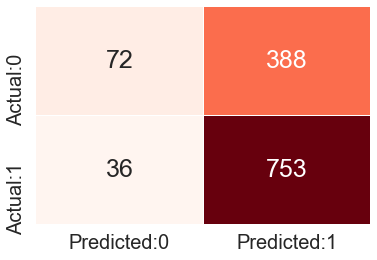

In [114]:
plot_confusion_matrix(mnb_model)

**Train Report**

In [115]:
train_report = get_train_report(mnb_model)

# print the performace measures
print(train_report)

              precision    recall  f1-score   support

           0       0.68      0.16      0.26       980
           1       0.69      0.96      0.81      1932

    accuracy                           0.69      2912
   macro avg       0.68      0.56      0.53      2912
weighted avg       0.69      0.69      0.62      2912



**Interpretation:** From the above output, we can see that the training model has 69% accuracy.

**Test Report**

In [116]:
test_report = get_test_report(mnb_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.67      0.16      0.25       460
           1       0.66      0.95      0.78       789

    accuracy                           0.66      1249
   macro avg       0.66      0.56      0.52      1249
weighted avg       0.66      0.66      0.59      1249



**Interpretation:** From the above output, we can see that the testing model is 66% accurate.

From the above classification reports,we can infer that there is a little difference when compared to test and train reports.
Hence we conclude that the model is bit overfitted.

**ROC curve**

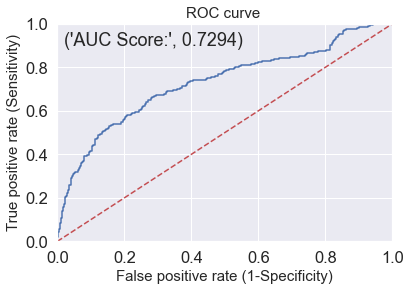

In [117]:
# call the function to plot the ROC curve
# pass the  multinomial naive bayes model to the function
plot_roc(mnb_model)

**Interpretation:**
From the above plot, we can see that our classifier (Multinomial NaiveBayes) is away from the dotted line; with the AUC score **0.7294**

#### Score Card

In [118]:
update_score_card('Navie Bayes',mnb_model)

Model_Name  Accuracy(Train)  Accuracy(Test)  \
0  Logistic Regression             0.76            0.74   
1          Navie Bayes             0.69            0.66   

   Diff_b/w_train&test(Acc)  AUC_Score  Avg(Acc)  
0                      0.02       0.80      0.76  
1                      0.03       0.73      0.69

# 8. K Nearest Neighbors (KNN)<a id="knn"></a>

**Finding  Optimal Value of K (using GridSearchCV)**

In [119]:
# create a dictionary with hyperparameters and its values
# n_neighnors: number of neighbors to consider
# usually, we consider the odd value of 'n_neighnors' to avoid the equal number of nearest points with more than one class
# pass the different distance metrics to the parameter, 'metric'
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 17} 



#### Building a knn model on a training dataset using the above best parameters.

In [120]:
# instantiate the 'KNeighborsClassifier'
# n_neighnors: number of neighbors to consider
# default metric is minkowski, and with p=2 it is equivalent to the euclidean metric
knn_classification = KNeighborsClassifier(n_neighbors =17,p=2)

# fit the model using fit() on train data
knn_model = knn_classification.fit(X_train, y_train)

#### Line plot to see the accuracy rate and  error rate for each value of K using euclidean distance as a metric of KNN model

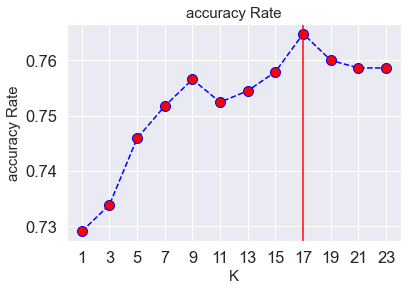

In [121]:
# consider an empty list to store accuracy rate
accuracy_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,25,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'euclidean')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, X_train, y_train, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute accuracy rate 
    accuracy_rate.append(score)

# plot the accuracy_rate for different values of K 
plt.plot(range(1,25,2), accuracy_rate,color ='blue',linestyle ='dashed', marker ='o',markerfacecolor ='red', markersize = 10)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('accuracy Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('accuracy Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the maximum accuracy rate
plt.axvline(x = 17, color = 'red')

# display the plot
plt.show()

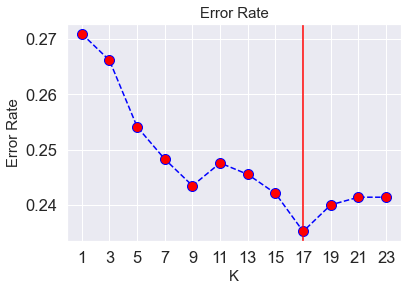

In [122]:
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,25,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'euclidean')
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, X_train, y_train, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,25,2), error_rate,color ='blue',linestyle ='dashed', marker ='o',markerfacecolor ='red', markersize = 10)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the minimum error rate
plt.axvline(x = 17, color = 'red')

# display the plot
plt.show()

**Interpretation:** We can see that the optimal value of K (= 17) obtained from the GridSearchCV() results in a lowest error rate and highest accuracy rate. 

**Confusion matrix**

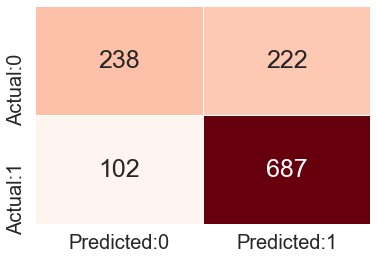

In [123]:
plot_confusion_matrix(knn_model)

**Train Report**

In [124]:
# compute the performance measures on test data
# call the function 'get_train_report'
# pass the knn model to the function
train_report = get_train_report(knn_model)

# print the performace measures
print(train_report)

              precision    recall  f1-score   support

           0       0.73      0.57      0.64       980
           1       0.81      0.89      0.85      1932

    accuracy                           0.79      2912
   macro avg       0.77      0.73      0.75      2912
weighted avg       0.78      0.79      0.78      2912



**Interpretation:** From the above output, we can see that the training model has 79% accuracy.

**Test report**

In [125]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the knn model to the function
test_report = get_test_report(knn_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.70      0.52      0.59       460
           1       0.76      0.87      0.81       789

    accuracy                           0.74      1249
   macro avg       0.73      0.69      0.70      1249
weighted avg       0.74      0.74      0.73      1249



**Interpretation:** From the above output, we can see that the testing model is 74% accurate.

**Interpretation:** From the above classification reports,we can infer that there is a little difference when compared to test and train reports.
Hence we conclude that the model is bit overfitted.

**ROC curve**

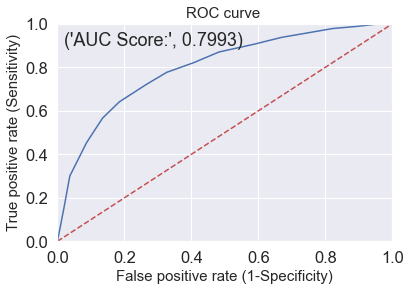

In [126]:
# call the function to plot the ROC curve
# pass the knn model to the function
plot_roc(knn_model)

**Interpretation:** 
From the above plot, we can see that our classifier (knn_model with n_neighbors = 17) is away from the dotted line; with the AUC score **0.7933**.

#### Score Card

In [127]:
update_score_card('KNeighbors Classifier',knn_model)

Model_Name  Accuracy(Train)  Accuracy(Test)  \
0    Logistic Regression             0.76            0.74   
1            Navie Bayes             0.69            0.66   
2  KNeighbors Classifier             0.79            0.74   

   Diff_b/w_train&test(Acc)  AUC_Score  Avg(Acc)  
0                      0.02       0.80      0.76  
1                      0.03       0.73      0.69  
2                      0.05       0.80      0.76

# 9. Decision Tree for Classification<a id="dec_tre"></a>

**Finding Hyperparameters using GridSearchCV (Decision Tree)**

In [128]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': [2,4,6,8,10],
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': [2,4,6,8,10],
                     'min_samples_leaf': [2,4,6,8,10],
                     'max_leaf_nodes': [2,4,6,8,10]}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_samples_split': 2} 



#### Building the model using the above obtained tuned hyperparameters.

In [129]:
decision_tree = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
decision_tree = decision_tree.fit(X_train, y_train)

**Decision tree with tuned hyperparameters**

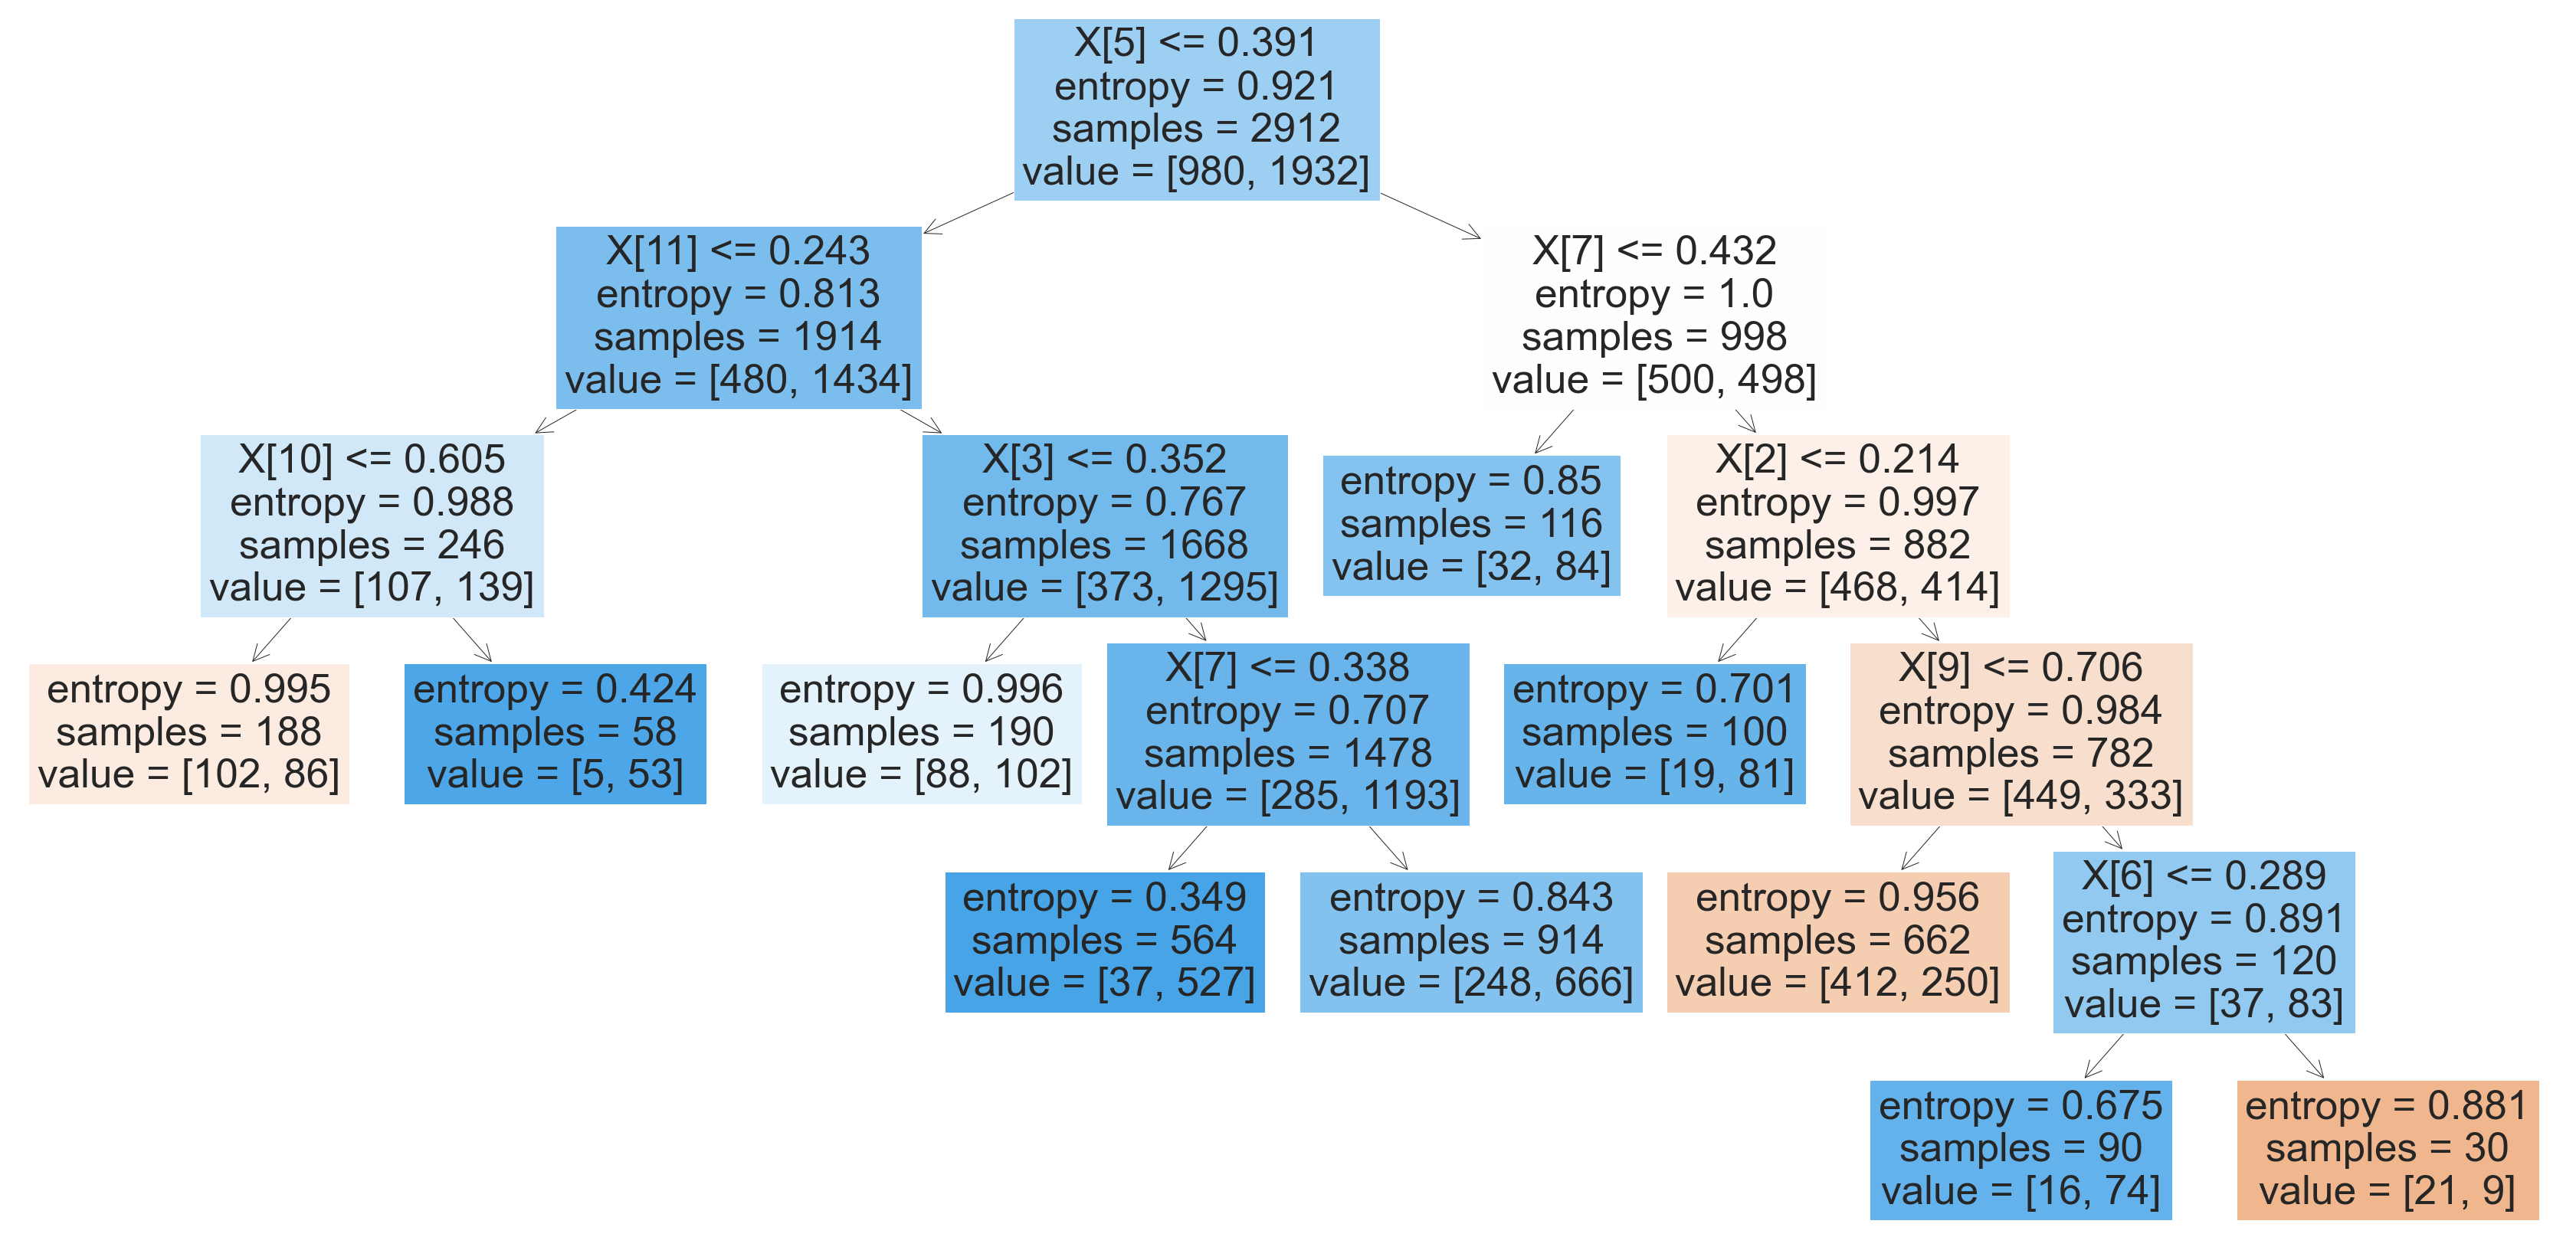

In [130]:
plt.figure(figsize=(60,30))
plot_tree(decision_tree, filled=True);

**Confusion matrix**

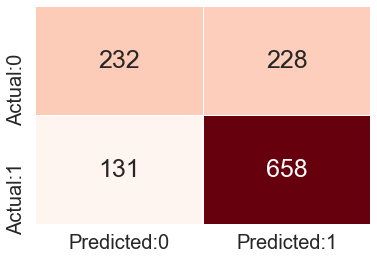

In [131]:
plot_confusion_matrix(decision_tree)

**Train report**

In [132]:
# compute the performance measures on test data
# call the function 'get_train_report'
# pass the decision tree  model to the function
train_report = get_train_report(decision_tree)

# print the performace measures
print(train_report)

              precision    recall  f1-score   support

           0       0.61      0.55      0.58       980
           1       0.78      0.82      0.80      1932

    accuracy                           0.73      2912
   macro avg       0.69      0.68      0.69      2912
weighted avg       0.72      0.73      0.72      2912



**Interpretation:** From the above output, we can see that the training model has 73% accuracy.

**Test report**

In [133]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree model to the function
test_report = get_test_report(decision_tree)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.64      0.50      0.56       460
           1       0.74      0.83      0.79       789

    accuracy                           0.71      1249
   macro avg       0.69      0.67      0.67      1249
weighted avg       0.70      0.71      0.70      1249



**Interpretation:** From the above output, we can see that the testing model is 71% accurate.

From the above classification reports,we can infer that there is a difference when compared to test and train reports.
Hence we conclude that the model is bit overfitted.

**ROC Curve**

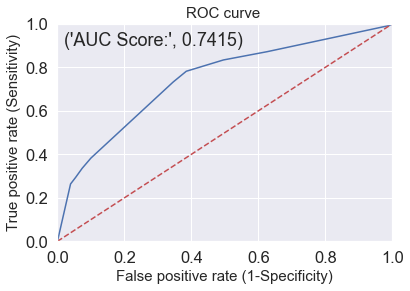

In [134]:
# call the function to plot the ROC curve
# pass the decision tree model to the function
plot_roc(decision_tree)

**Interpretation:** 
From the above plot, we can see that our classifier (Decision tree) is away from the dotted line; with the AUC score **0.7415**.

#### Score Card

In [135]:
update_score_card('Decision Tree Classifier',decision_tree)

Model_Name  Accuracy(Train)  Accuracy(Test)  \
0       Logistic Regression             0.76            0.74   
1               Navie Bayes             0.69            0.66   
2     KNeighbors Classifier             0.79            0.74   
3  Decision Tree Classifier             0.73            0.71   

   Diff_b/w_train&test(Acc)  AUC_Score  Avg(Acc)  
0                      0.02       0.80      0.76  
1                      0.03       0.73      0.69  
2                      0.05       0.80      0.76  
3                      0.02       0.74      0.70

In order to decrease the overfitting and increase the performance and accuracy of the Decision tree model.We further perform some Bagging and Boosting techniques.

# 10. Random Forest<a id="ran_for"></a>

**Tuning the Hyperparameters using GridSearchCV**

In [136]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [ 30, 50, 70],
                     'max_depth': [10,15,20],
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': [2,6,10],
                     'min_samples_leaf': [2,6,10],
                     'max_leaf_nodes': [2,6,10]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 50} 



#### Building the model using the tuned hyperparameters obtained above.

In [137]:
# instantiate the 'RandomForestClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'),
                                   n_estimators=rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
random_forest = random_forest.fit(X_train, y_train)

**Confusion matrix**

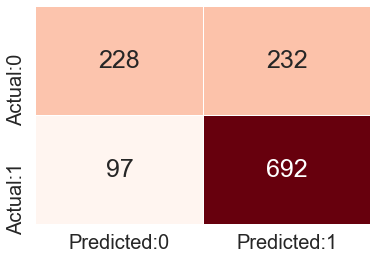

In [138]:
plot_confusion_matrix(random_forest)

**Train report**

In [139]:
# compute the performance measures on test data
# call the function 'get_train_report'
# pass the Random Forest  model to the function
train_report = get_train_report(random_forest)


# print the performace measures
print(train_report)

              precision    recall  f1-score   support

           0       0.73      0.53      0.61       980
           1       0.79      0.90      0.84      1932

    accuracy                           0.77      2912
   macro avg       0.76      0.71      0.73      2912
weighted avg       0.77      0.77      0.76      2912



**Interpretation:** From the above output, we can see that the training model has 77% accuracy.

**Test report**

In [140]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the Random Forest model to the function
test_report = get_test_report(random_forest)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.70      0.50      0.58       460
           1       0.75      0.88      0.81       789

    accuracy                           0.74      1249
   macro avg       0.73      0.69      0.69      1249
weighted avg       0.73      0.74      0.72      1249



**Interpretation:** From the above output, we can see that the testing model is 74% accurate.

**ROC Curve**

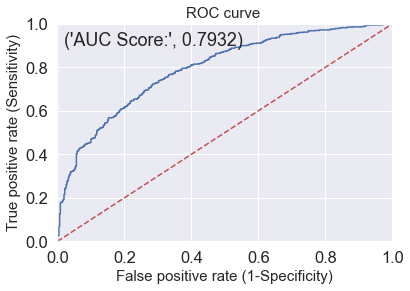

In [141]:
# call the function to plot the ROC curve
# pass the random forest model to the function
plot_roc(random_forest)

**Interpretation:** 
From the above plot, we can see that our classifier (random forest) is away from the dotted line; with the AUC score **0.7932**.

#### Score Card

In [142]:
update_score_card('Random Forest Classifier',random_forest)

Model_Name  Accuracy(Train)  Accuracy(Test)  \
0       Logistic Regression             0.76            0.74   
1               Navie Bayes             0.69            0.66   
2     KNeighbors Classifier             0.79            0.74   
3  Decision Tree Classifier             0.73            0.71   
4  Random Forest Classifier             0.77            0.74   

   Diff_b/w_train&test(Acc)  AUC_Score  Avg(Acc)  
0                      0.02       0.80      0.76  
1                      0.03       0.73      0.69  
2                      0.05       0.80      0.76  
3                      0.02       0.74      0.70  
4                      0.04       0.79      0.75

# 11. AdaBoost<a id="ada"></a>

**Tune the Hyperparameters (GridSearchCV)**

In [143]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],'n_estimators' : [10,20,30,40,50]}
ada_model = AdaBoostClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the AdaBoost classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 3
# scoring: pass a measure to evaluate the model on test set
ada_grid = GridSearchCV(estimator = ada_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')

# fit the model on X_train and y_train using fit()
ada_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for ADABoost classifier: ', ada_grid.best_params_, '\n')

Best parameters for ADABoost classifier:  {'learning_rate': 0.4, 'n_estimators': 40} 



**Building an Adaboost model on a training dataset.**

In [144]:
# instantiate the 'AdaBoostClassifier'
# n_estimators: number of estimators at which boosting is terminated
# pass the 'random_state' to obtain the same results for each code implementation
ada_model = AdaBoostClassifier(n_estimators = 40, random_state = 10,learning_rate= 0.4)

# fit the model using fit() on train data
ada_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.4, n_estimators=40, random_state=10)

**Confusion Matrix**

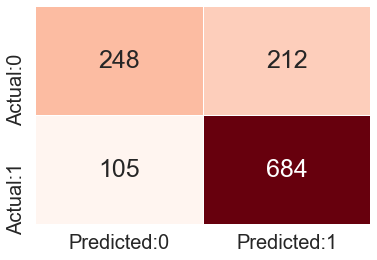

In [145]:
plot_confusion_matrix(ada_model)

**Train Report**

In [146]:
# compute the performance measures on test data
# call the function 'get_train_report'
# pass the adaboost model to the function
train_report = get_train_report(ada_model)

# print the performace measures
print(train_report)

              precision    recall  f1-score   support

           0       0.71      0.57      0.63       980
           1       0.80      0.88      0.84      1932

    accuracy                           0.78      2912
   macro avg       0.76      0.72      0.73      2912
weighted avg       0.77      0.78      0.77      2912



**Interpretation:** From the above output, we can see that the training model has 78% accuracy.

**Test Report**

In [147]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the adaboost model to the function
test_report = get_test_report(ada_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.70      0.54      0.61       460
           1       0.76      0.87      0.81       789

    accuracy                           0.75      1249
   macro avg       0.73      0.70      0.71      1249
weighted avg       0.74      0.75      0.74      1249



**Interpretation:** From the above output, we can see that the testing model is 75% accurate.

**ROC Curve**

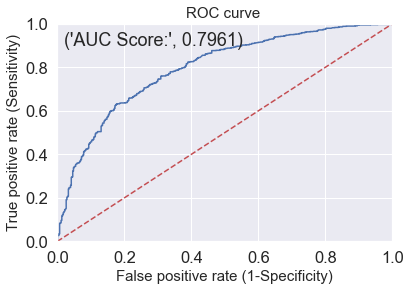

In [148]:
# call the function to plot the ROC curve
# pass the adaboost model to the function
plot_roc(ada_model)

**Interpretation:** 
From the above plot, we can see that our classifier (ADA Boost) is away from the dotted line; with the AUC score **0.7961**.

#### Score Card

In [149]:
update_score_card('Ada Boost Classifier',ada_model)

Model_Name  Accuracy(Train)  Accuracy(Test)  \
0       Logistic Regression             0.76            0.74   
1               Navie Bayes             0.69            0.66   
2     KNeighbors Classifier             0.79            0.74   
3  Decision Tree Classifier             0.73            0.71   
4  Random Forest Classifier             0.77            0.74   
5      Ada Boost Classifier             0.78            0.75   

   Diff_b/w_train&test(Acc)  AUC_Score  Avg(Acc)  
0                      0.02       0.80      0.76  
1                      0.03       0.73      0.69  
2                      0.05       0.80      0.76  
3                      0.02       0.74      0.70  
4                      0.04       0.79      0.75  
5                      0.03       0.80      0.76

# 12. Gradient Boosting<a id="gra_boo"></a>

**Tune the Hyperparameters (GridSearchCV)**

In [150]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],'n_estimators':[30, 50, 70, 90],
                     'max_depth': [2,6,10],'min_samples_split': [2,6,10],
                     'min_samples_leaf': [2,6,10]}
gboost_model = GradientBoostingClassifier()
gb_grid = GridSearchCV(estimator = gboost_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc')
gb_grid.fit(X_train, y_train)
print('Best parameters for GBoost classifier: ', gb_grid.best_params_, '\n')

Best parameters for GBoost classifier:  {'learning_rate': 0.2, 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 6, 'n_estimators': 50} 



#### Building a Gradient boost model on a training dataset

In [151]:
gboost_model = GradientBoostingClassifier(n_estimators = 70, random_state = 10,learning_rate=0.2,
                                          min_samples_leaf=10,min_samples_split=2,max_depth= 2)
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=2, min_samples_leaf=10,
                           n_estimators=70, random_state=10)

**Confusion Matrix**

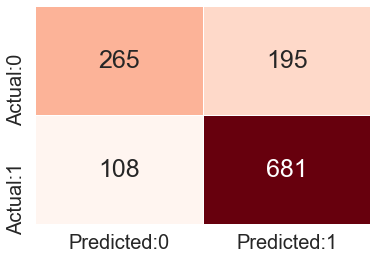

In [152]:
plot_confusion_matrix(gboost_model)

**Train report**

In [153]:
train_report = get_train_report(gboost_model)

# print the performace measures
print(train_report)

              precision    recall  f1-score   support

           0       0.75      0.63      0.68       980
           1       0.83      0.89      0.86      1932

    accuracy                           0.80      2912
   macro avg       0.79      0.76      0.77      2912
weighted avg       0.80      0.80      0.80      2912



**Interpretation:** From the above output, we can see that the training model has 80% accuracy.

**Test Report**

In [154]:
test_report = get_test_report(gboost_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.71      0.58      0.64       460
           1       0.78      0.86      0.82       789

    accuracy                           0.76      1249
   macro avg       0.74      0.72      0.73      1249
weighted avg       0.75      0.76      0.75      1249



**Interpretation:** From the above output, we can see that the testing model is 76% accurate.

**ROC Curve**

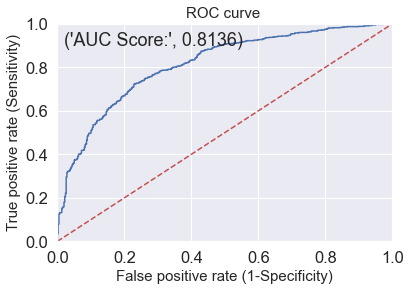

In [155]:
plot_roc(gboost_model)

**Interpretation:** 

From the above plot, we can see that our classifier(Gradient Boosting model) is away from the dotted line; with the AUC score **0.8136**.

**Score Card**

In [156]:
update_score_card('Gradient Boosting Classifier',gboost_model)

Model_Name  Accuracy(Train)  Accuracy(Test)  \
0           Logistic Regression             0.76            0.74   
1                   Navie Bayes             0.69            0.66   
2         KNeighbors Classifier             0.79            0.74   
3      Decision Tree Classifier             0.73            0.71   
4      Random Forest Classifier             0.77            0.74   
5          Ada Boost Classifier             0.78            0.75   
6  Gradient Boosting Classifier             0.80            0.76   

   Diff_b/w_train&test(Acc)  AUC_Score  Avg(Acc)  
0                      0.02       0.80      0.76  
1                      0.03       0.73      0.69  
2                      0.05       0.80      0.76  
3                      0.02       0.74      0.70  
4                      0.04       0.79      0.75  
5                      0.03       0.80      0.76  
6                      0.05       0.81      0.77

# 13 Extreme Gradient Boosting (XGB)<a id="xgb"> </a>

**Tuning the Hyperparameters (GridSearchCV)**

In [157]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                     'max_depth': [1,3,5,7,9],
                     'gamma': [0, 1, 2, 3, 4]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 3, scoring = 'roc_auc',verbose=0)
xgb_grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

[20:45:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:45:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:45:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:45:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

#### Building an Extreme Gradient boost model on a training dataset

In [172]:
xgb_model = XGBClassifier(learning_rate=0.1, gamma = 1,max_depth=3,verbosity=0)

# fit the model using fit() on train data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

**Confusion Matrix**

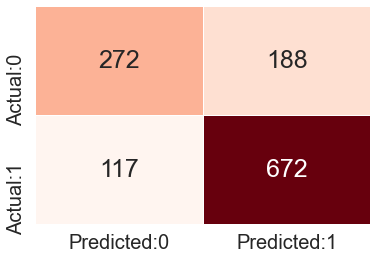

In [159]:
plot_confusion_matrix(xgb_model)

**Train Report**

In [160]:
train_report = get_train_report(xgb_model)

# print the performace measures
print(train_report)

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       980
           1       0.84      0.90      0.87      1932

    accuracy                           0.82      2912
   macro avg       0.81      0.79      0.79      2912
weighted avg       0.82      0.82      0.82      2912



**Interpretation:** From the above output, we can see that the training model has 82% accuracy.

**Test Report**

In [161]:
test_report = get_test_report(xgb_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.70      0.59      0.64       460
           1       0.78      0.85      0.82       789

    accuracy                           0.76      1249
   macro avg       0.74      0.72      0.73      1249
weighted avg       0.75      0.76      0.75      1249



**Interpretation:** From the above output, we can see that the testing model is 76% accurate.

**ROC Curve**

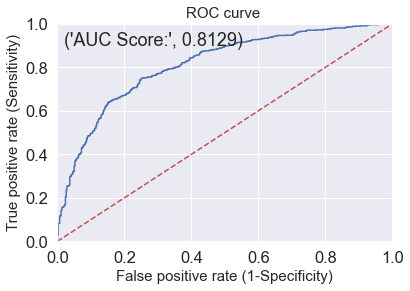

In [162]:
plot_roc(xgb_model)

**Interpretation:** 

From the above plot, we can see that our classifier(Extreme Gradient Boosting model) is away from the dotted line; with the AUC score **0.8129**.

#### Score Card

In [163]:
update_score_card('Extreme Gradient Boosting Classifier',xgb_model)

Model_Name  Accuracy(Train)  Accuracy(Test)  \
0                   Logistic Regression             0.76            0.74   
1                           Navie Bayes             0.69            0.66   
2                 KNeighbors Classifier             0.79            0.74   
3              Decision Tree Classifier             0.73            0.71   
4              Random Forest Classifier             0.77            0.74   
5                  Ada Boost Classifier             0.78            0.75   
6          Gradient Boosting Classifier             0.80            0.76   
7  Extreme Gradient Boosting Classifier             0.82            0.76   

   Diff_b/w_train&test(Acc)  AUC_Score  Avg(Acc)  
0                      0.02       0.80      0.76  
1                      0.03       0.73      0.69  
2                      0.05       0.80      0.76  
3                      0.02       0.74      0.70  
4                      0.04       0.79      0.75  
5                      0.03       0.80      0.76  
6                      0.05       0.81      0.77  
7                      0.07       0.81      0.76

# 14. Stack Generalization<a id="stack"></a>

In [164]:
# consider the various algorithms as base learners
base_learners = [('rf_model', RandomForestClassifier(criterion = 'gini', max_depth = 10, max_features = 'sqrt', 
                                                     max_leaf_nodes = 10, min_samples_leaf = 10, min_samples_split = 2, 
                                                     n_estimators = 50, random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(n_neighbors = 17, metric = 'euclidean')),
                 ('NB_model', MultinomialNB()),
                 ('Decision_tree',DecisionTreeClassifier(criterion = 'entropy', max_depth= 6, max_features= 'sqrt',
                                                         max_leaf_nodes= 10, min_samples_leaf= 10, min_samples_split= 2,random_state = 10))]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the XGB Classifier model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = XGBClassifier())

# fit the model on train dataset
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=10,
                                                       min_samples_leaf=10,
                                                       n_estimators=50,
                                                       random_state=10)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='euclidean',
                                                     n_neighbors=17)),
                               ('NB_model', MultinomialNB()),
                               ('Decision_tree',
                                DecisionTreeClassifier(criterion='entropy',
                                                       max_depth=6,
                                                       max_feat...
    

**Confusion Matrix**

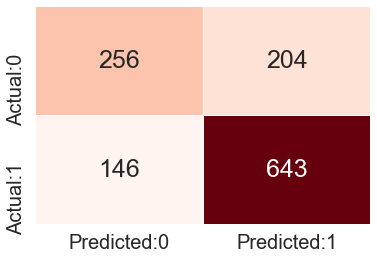

In [165]:
plot_confusion_matrix(stack_model)

**Train Report**

In [166]:
train_report = get_train_report(stack_model)

# print the performace measures
print(train_report)

              precision    recall  f1-score   support

           0       0.65      0.63      0.64       980
           1       0.81      0.83      0.82      1932

    accuracy                           0.76      2912
   macro avg       0.73      0.73      0.73      2912
weighted avg       0.76      0.76      0.76      2912



**Interpretation:** From the above output, we can see that the training model has 76% accuracy.

**Test Report**

In [167]:
test_report = get_test_report(stack_model)

# print the performance measures
print(test_report)

              precision    recall  f1-score   support

           0       0.64      0.56      0.59       460
           1       0.76      0.81      0.79       789

    accuracy                           0.72      1249
   macro avg       0.70      0.69      0.69      1249
weighted avg       0.71      0.72      0.72      1249



**Interpretation:** From the above output, we can see that the testing model is 72% accurate.

**ROC Curve**

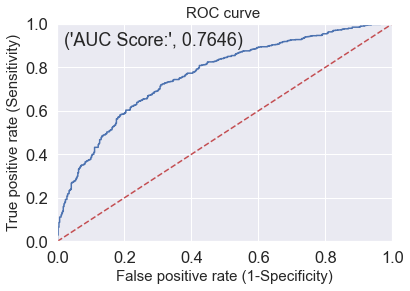

In [168]:
plot_roc(stack_model)

**Interpretation:** 

From the above plot, we can see that our classifier(Stack Generalized model) is away from the dotted line; with the AUC score **0.7646**.

#### Score Card

In [169]:
update_score_card('Stack Generalization',stack_model)

Model_Name  Accuracy(Train)  Accuracy(Test)  \
0                   Logistic Regression             0.76            0.74   
1                           Navie Bayes             0.69            0.66   
2                 KNeighbors Classifier             0.79            0.74   
3              Decision Tree Classifier             0.73            0.71   
4              Random Forest Classifier             0.77            0.74   
5                  Ada Boost Classifier             0.78            0.75   
6          Gradient Boosting Classifier             0.80            0.76   
7  Extreme Gradient Boosting Classifier             0.82            0.76   
8                  Stack Generalization             0.76            0.72   

   Diff_b/w_train&test(Acc)  AUC_Score  Avg(Acc)  
0                      0.02       0.80      0.76  
1                      0.03       0.73      0.69  
2                      0.05       0.80      0.76  
3                      0.02       0.74      0.70  
4                      0.04       0.79      0.75  
5                      0.03       0.80      0.76  
6                      0.05       0.81      0.77  
7                      0.07       0.81      0.76  
8                      0.04       0.76      0.73

# 15. Displaying score summary<a id="dis_sco"></a>

In [170]:
score_card = score_card.sort_values('Diff_b/w_train&test(Acc)').reset_index(drop = True)

score_card.style.highlight_min(color = 'red', subset = ['Diff_b/w_train&test(Acc)'])

**Interpretation:**  We can see that Decision tree classifier has the lowest difference between train accuracy and test                                   accuracy.Hence,we conclude Decision tree classifier is the `Best_Model`

# 16. Feature Importance<a id="fea_imp"></a>

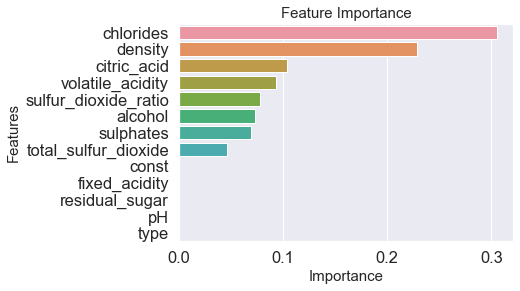

In [171]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': decision_tree.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The above bar plot shows that, of all the features `chlorides` is of most important feature. 

# 17. Conclusion<a id="conclu"></a>

**Of all the models built, we see that Decision tree classifier model has been the most effective with no overfitting.**

**Some of the features which contribute more for prediction of quality are chlorides,density,citric acid,volatile_acidity and sulfur_dioxide_ratio.**

**Results can be used by wine manufactures to improve the quality of wine in future and can also be used by consumers for wine selection.**

**We can hereby conclude that we have successfully built a model that can predict quality of wine.**

# 18.Deployment<a id="deploy"></a>

https://winesupreme.herokuapp.com/

# 19. References<a id="Refer"></a>

https://www.ijsr.net/archive/v9i7/SR20718002904.pdf

https://ijcat.com/archieve/volume8/issue9/ijcatr08091010.pdf

https://broncoscholar.library.cpp.edu/bitstream/handle/10211.3/216015/NelsonGregory_Thesis2020.pdf?sequence=3

http://cs229.stanford.edu/proj2015/245_report.pdf

https://scihub.se/https://www.sciencedirect.com/science/article/pii/S1877050917328053

<table align="center" width=100%>
    <tr>
        <td width="30%">
            <img src="tenor.gif">
        </td>
        <td>
            <div align="center">
                <font color="#C70039 " size=24px>
                    <b>Thank You.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>